In [1]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.stats import kruskal
from statsmodels.stats.multicomp import MultiComparison

from itertools import chain
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

cf.go_offline()
pd.set_option('display.max_columns',None)

# Analisis de clusters

In [197]:
from sklearn.preprocessing import MinMaxScaler

In [198]:
X=matriz_estudio.copy()

In [199]:
sc = StandardScaler()

Xs = pd.DataFrame(index = X.index, data = sc.fit_transform(X), columns=X.columns)

# Visualización

TSNE

In [200]:
tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(Xs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [201]:
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=Xs.index)

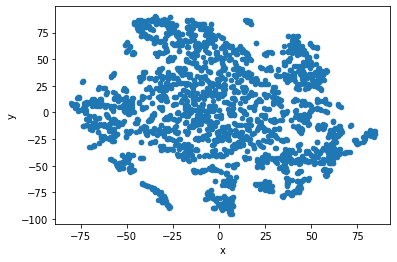

In [202]:
df_tsne.plot.scatter('x','y')

PCA

In [203]:
n_components = 2
pca = PCA(n_components=n_components)
Xp = pd.DataFrame(pca.fit_transform(Xs),columns=[f"p_{i}" for i in  range(1,n_components+1)])

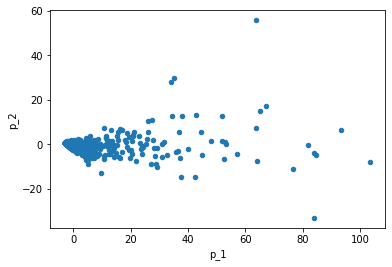

In [204]:
Xp.plot.scatter('p_1','p_2')

# Clusterización

## Standar_scaler

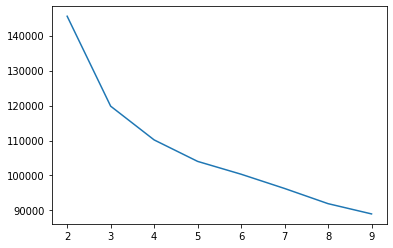

In [205]:
#incercia-kmeans: 3
l = []
for k in range(2,10):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(Xs)
    l.append((k,km.inertia_))
inercia = pd.DataFrame(l,columns=['k','inercia'])

plt.plot(inercia['k'],inercia['inercia'])

2
3
4
5
6
7
8
9


/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



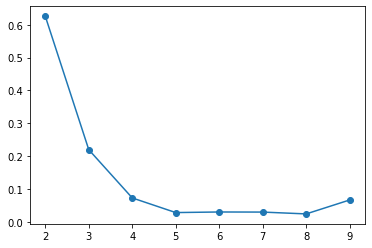

In [206]:
#silueta-gauss: 2, 3  


l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='spherical',)
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


2
3
4
5
6
7
8
9


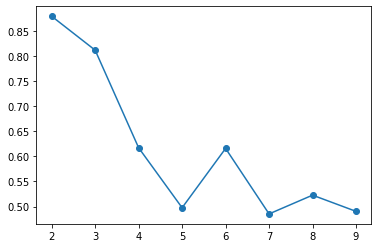

In [207]:
#Silueta-kmeans: 5

l = []
for k in range(2,10):
    print(k)
    
    km = KMeans(n_clusters=k)
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')

In [208]:
#aicbic-gauss: 6
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='spherical')
    km.fit(Xs)
    l_bic.append((k,km.bic(Xs)))
    l_aic.append((k,km.aic(Xs)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



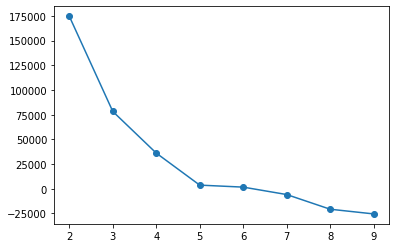

In [209]:
plt.plot(aic['k'],aic['aic'],marker='o')

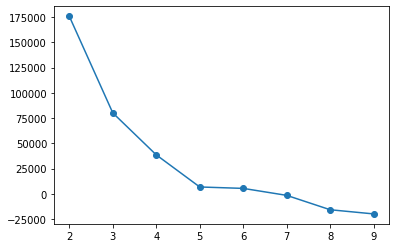

In [210]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [211]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [212]:
#davis_kmeans: 2 , 3
lst_dbscore=[]
for k in range(2,11):
    cl_db = KMeans(n_clusters=k)
    cl_db.fit(Xs)
    lst_dbscore.append(davies_bouldin_score(Xs,cl_db.predict(Xs)))

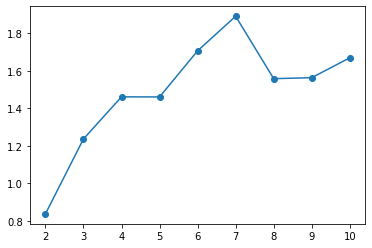

In [213]:
plt.plot(range(2,11),lst_dbscore,marker='o')

### Variación hiperarametros gauss

In [214]:
## gauss diag



2
3
4
5
6
7
8
9


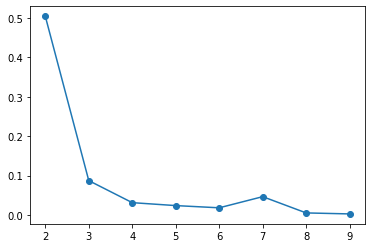

In [215]:
#silueta-gauss-diag: 2 


l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='diag')
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


In [216]:
#aicbic-gauss: 5
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='diag')
    km.fit(Xs)
    l_bic.append((k,km.bic(Xs)))
    l_aic.append((k,km.aic(Xs)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

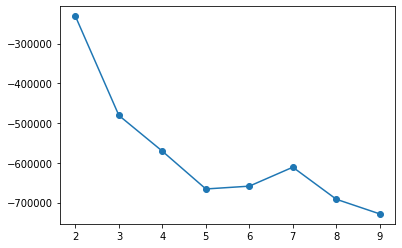

In [217]:
plt.plot(aic['k'],aic['aic'],marker='o')

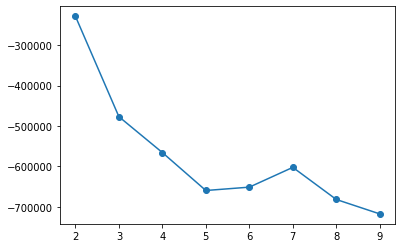

In [218]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [219]:
#gauss tied

2
3
4
5
6
7
8
9


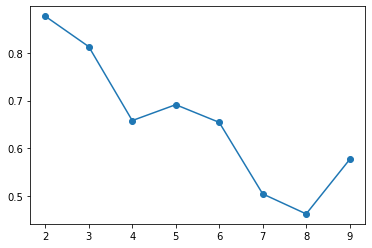

In [220]:
#silueta-gauss: 3 


l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='tied')
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


In [221]:
#aicbic-gauss: 3
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='tied')
    km.fit(Xs)
    l_bic.append((k,km.bic(Xs)))
    l_aic.append((k,km.aic(Xs)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

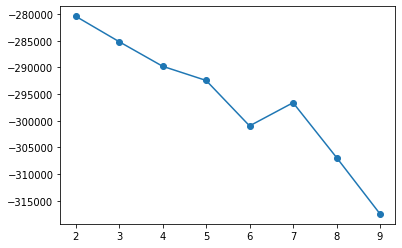

In [222]:
plt.plot(aic['k'],aic['aic'],marker='o')

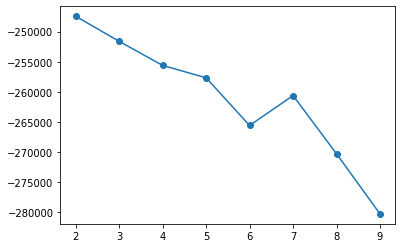

In [223]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [224]:
#gauss full

2
3
4
5
6
7
8
9


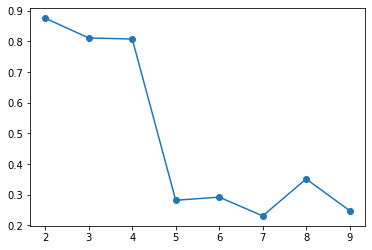

In [225]:
#silueta-gauss: 4 


l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='full')
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


In [226]:
#aicbic-gauss: 3
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='full')
    km.fit(Xs)
    l_bic.append((k,km.bic(Xs)))
    l_aic.append((k,km.aic(Xs)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

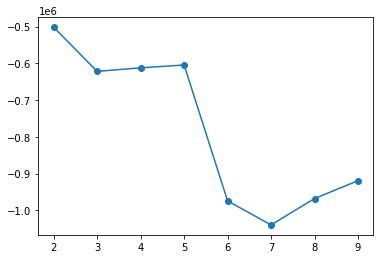

In [227]:
plt.plot(aic['k'],aic['aic'],marker='o')

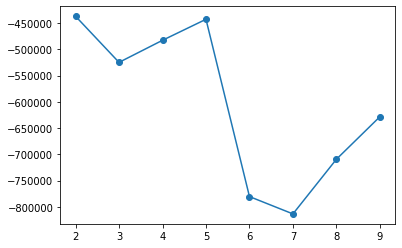

In [228]:
plt.plot(bic['k'],bic['bic'],marker='o')

## Minmax_scaler

In [229]:
ss = MinMaxScaler()

Xs = pd.DataFrame(index = X.index, data = ss.fit_transform(X), columns=X.columns)

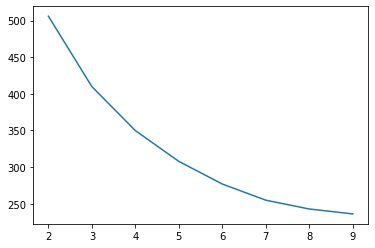

In [230]:
#incercia-kmeans: 3
l = []
for k in range(2,10):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(Xs)
    l.append((k,km.inertia_))
inercia = pd.DataFrame(l,columns=['k','inercia'])

plt.plot(inercia['k'],inercia['inercia'])

2
3
4
5
6
7
8
9


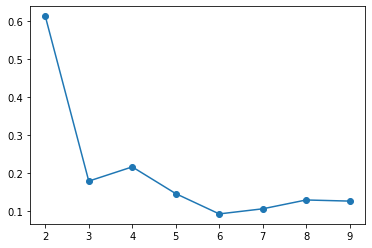

In [231]:
#silueta-gauss:
#esferica: 3  
#tied :

l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='spherical')
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


2
3
4
5
6
7
8
9


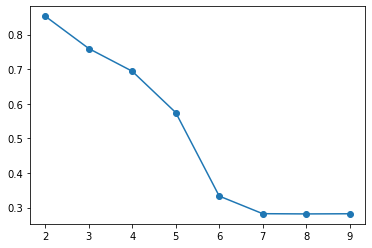

In [232]:
#Silueta-kmeans: 2,3 

l = []
for k in range(2,10):
    print(k)
    
    km = KMeans(n_clusters=k)
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')

In [233]:
#aicbic-gauss: 4
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='spherical')
    km.fit(Xs)
    l_bic.append((k,km.bic(Xs)))
    l_aic.append((k,km.aic(Xs)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



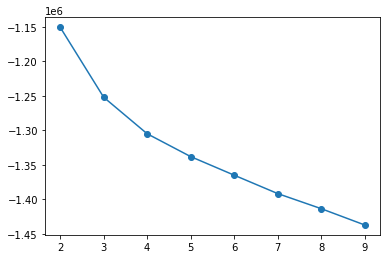

In [234]:
plt.plot(aic['k'],aic['aic'],marker='o')

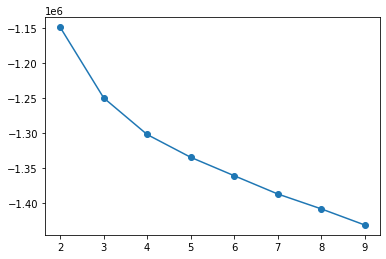

In [235]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [236]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [237]:
#davis_kmeans: 2 , 3
lst_dbscore=[]
for k in range(2,11):
    cl_db = KMeans(n_clusters=k)
    cl_db.fit(Xs)
    lst_dbscore.append(davies_bouldin_score(Xs,cl_db.predict(Xs)))

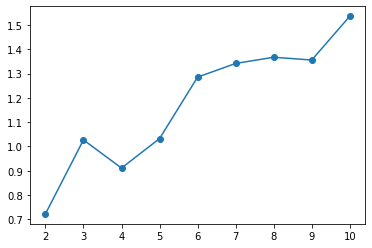

In [238]:
plt.plot(range(2,11),lst_dbscore,marker='o')

### Variación hiperarametros gauss

In [239]:
## gauss diag



2
3
4
5
6
7
8
9


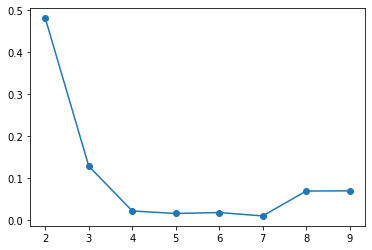

In [240]:
#silueta-gauss-diag: 2 


l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='diag')
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


In [241]:
#aicbic-gauss: 4
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='diag')
    km.fit(Xs)
    l_bic.append((k,km.bic(Xs)))
    l_aic.append((k,km.aic(Xs)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



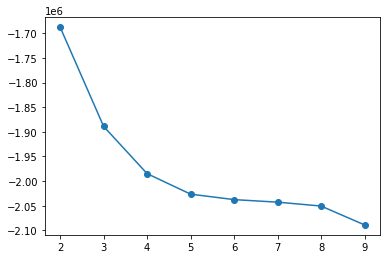

In [242]:
plt.plot(aic['k'],aic['aic'],marker='o')

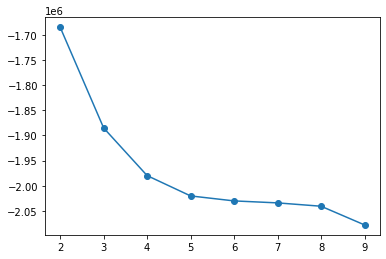

In [243]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [244]:
#gauss tied

2
3
4
5
6
7
8
9


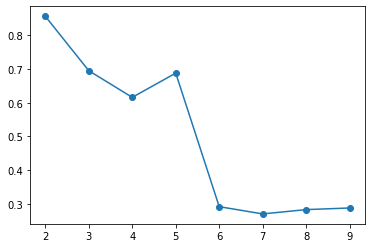

In [245]:
#silueta-gauss: 2, 3 


l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='tied')
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


In [246]:
#aicbic-gauss: 7
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='tied')
    km.fit(Xs)
    l_bic.append((k,km.bic(Xs)))
    l_aic.append((k,km.aic(Xs)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

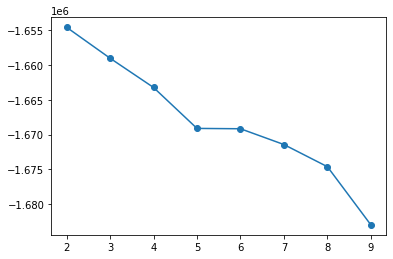

In [247]:
plt.plot(aic['k'],aic['aic'],marker='o')

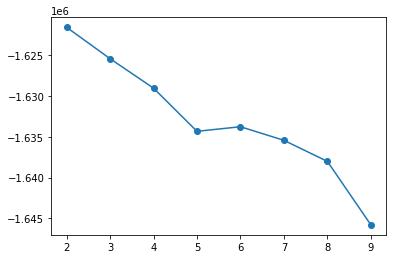

In [248]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [249]:
#gauss full

2
3
4
5
6
7
8
9


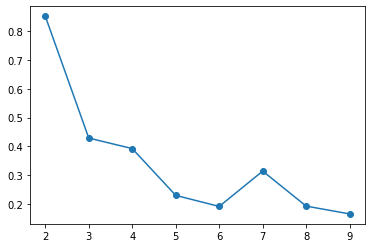

In [250]:
#silueta-gauss: 5


l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='full')
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


In [251]:
#aicbic-gauss: 4
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='full')
    km.fit(Xs)
    l_bic.append((k,km.bic(Xs)))
    l_aic.append((k,km.aic(Xs)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

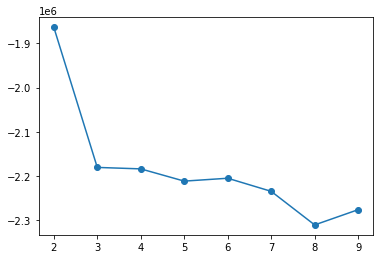

In [252]:
plt.plot(aic['k'],aic['aic'],marker='o')

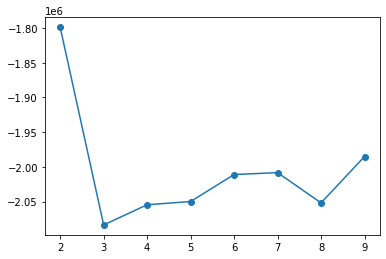

In [253]:
plt.plot(bic['k'],bic['bic'],marker='o')

## Transformación PCA

In [254]:
ss = StandardScaler()

Xs = pd.DataFrame(index = X.index, data = ss.fit_transform(X), columns=X.columns)

In [255]:
from sklearn.decomposition import PCA

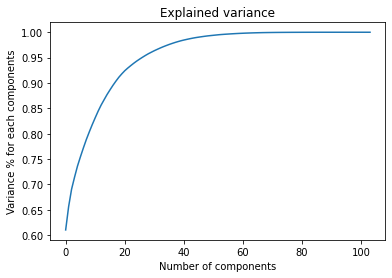

In [256]:
#fitting the pca algorithm with our data
pca=PCA().fit(Xs)
#plotting the cumulative summation of the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance % for each components')
plt.title('Explained variance')
plt.show()

In [257]:
pca=PCA(n_components=40)

In [258]:
pca.fit(Xs)

PCA(n_components=40)

In [259]:
pca.explained_variance_ratio_

array([0.61028481, 0.04588755, 0.03437583, 0.02359129, 0.02200485,
       0.01840563, 0.01744927, 0.01660059, 0.01500436, 0.01434412,
       0.01350099, 0.01308434, 0.01190155, 0.01041395, 0.01029926,
       0.00923868, 0.00893903, 0.00823834, 0.00773114, 0.00667633,
       0.00613609, 0.00518575, 0.00478027, 0.00461544, 0.00431304,
       0.00393268, 0.00377065, 0.00358326, 0.00337493, 0.00299194,
       0.00295932, 0.00268394, 0.00260998, 0.00248674, 0.00227806,
       0.0021973 , 0.00200933, 0.00191213, 0.00175766, 0.00163812])

In [260]:
pca.explained_variance_ratio_.cumsum()

array([0.61028481, 0.65617236, 0.69054819, 0.71413948, 0.73614433,
       0.75454996, 0.77199923, 0.78859982, 0.80360419, 0.8179483 ,
       0.8314493 , 0.84453364, 0.85643519, 0.86684913, 0.8771484 ,
       0.88638707, 0.89532611, 0.90356445, 0.91129559, 0.91797192,
       0.92410801, 0.92929376, 0.93407403, 0.93868948, 0.94300252,
       0.9469352 , 0.95070584, 0.9542891 , 0.95766403, 0.96065597,
       0.96361529, 0.96629923, 0.96890921, 0.97139595, 0.97367401,
       0.97587132, 0.97788064, 0.97979277, 0.98155043, 0.98318855])

In [261]:
columns = ['pca_comp_%i' % i for i in range(1,41)]

In [262]:
Xp = pd.DataFrame(pca.transform(Xs),columns=columns)

In [263]:
Xp

,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,pca_comp_10,pca_comp_11,pca_comp_12,pca_comp_13,pca_comp_14,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24,pca_comp_25,pca_comp_26,pca_comp_27,pca_comp_28,pca_comp_29,pca_comp_30,pca_comp_31,pca_comp_32,pca_comp_33,pca_comp_34,pca_comp_35,pca_comp_36,pca_comp_37,pca_comp_38,pca_comp_39,pca_comp_40
0,52.904085,0.873517,9.306966,7.108966,4.085677,-1.524509,-0.205519,-3.796300,1.161969,-5.096859,-8.164869,-8.632352,-9.169668,6.248007,-1.756651,2.269856,-11.688204,6.278301,-4.902477,-6.043270,3.117549,1.536703,-1.371580,4.625643,1.229910,-0.561946,8.945257,-2.957961,0.147267,-0.459164,-4.337465,3.165496,-3.139533,-1.654064,1.323099,4.164410,-0.922773,0.102772,-1.107258,-1.481745
1,0.249785,-0.590667,0.467763,0.483119,1.213396,-1.284284,4.495515,-0.856855,-3.275401,-1.741278,0.129755,0.327527,-0.847300,-0.124172,-0.418071,-0.321806,-0.464894,0.307743,-1.272364,-0.281269,0.270962,0.303308,0.101428,0.009305,0.101943,0.589453,1.205602,-0.731286,0.290395,-0.545505,0.004224,0.296210,-0.581282,-0.506283,0.113652,-0.525576,-0.337279,0.432207,0.501338,-0.284983
2,0.743255,-1.357629,0.032798,0.898971,1.032146,-0.665521,-0.481685,-1.255134,-1.196014,0.340965,-0.482460,0.301500,-0.592695,0.006569,0.080994,-0.085512,-0.435005,0.185346,-1.080845,0.213452,0.535116,0.873714,-0.408800,-0.403319,0.319951,0.755383,0.289185,-0.642792,0.090037,0.034824,-0.288307,0.319921,0.215558,-0.358858,-0.743050,-0.021941,0.210290,0.006927,-0.001175,-0.383174
3,-1.630119,0.381022,0.397940,-0.165826,0.453686,-0.606756,-0.249374,-1.036443,-1.374263,-0.066213,0.056976,-0.139008,0.077398,0.020259,-0.314872,-0.317616,0.085472,0.064459,-0.547737,-0.236064,0.137107,-0.354569,0.226398,-0.301717,-0.111775,0.334311,0.351133,-0.196466,0.275280,0.119923,-0.119788,-0.104350,-0.381972,-0.209034,0.193267,0.153638,-0.288870,-0.123969,-0.103696,-0.113359
4,4.643519,-0.337194,0.785316,1.117678,1.011832,-0.693150,-0.659142,-1.719761,-1.153308,-0.388328,-0.127773,-0.423396,-0.642228,0.608401,-0.069633,0.138030,-0.872422,0.641553,-0.957317,-0.513040,0.693372,0.576835,-0.971283,0.156553,-0.009409,0.285543,0.626842,-0.477488,-0.430230,0.058026,-0.820188,0.301354,0.359168,-0.713576,-0.964913,0.811267,0.249315,-0.246546,0.230391,-0.368868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,-1.620415,-0.256790,0.116154,0.057320,-0.167439,-0.104779,0.032465,0.311647,0.521174,-0.458074,-0.313574,0.156429,0.262111,-0.051007,0.268129,-0.094097,-0.045889,0.070894,-0.283676,0.149017,0.252366,0.162280,0.200378,-0.324734,-0.009620,0.225024,0.183639,0.233162,-0.215610,-0.105398,-0.025436,0.135678,0.318494,0.053213,-0.428164,0.096380,-0.006051,0.052589,-0.224874,-0.228761
2461,-0.412234,-0.410109,-0.009300,-0.127805,0.619849,-0.933750,-0.750123,0.074894,-0.327916,0.188899,-0.299245,0.803964,-0.121685,0.930084,0.306483,0.360957,-0.024868,0.020491,-0.275983,0.603241,0.147763,0.542509,0.356802,0.132658,0.005573,0.660468,0.235525,-0.640943,-0.117191,-0.048777,-0.045156,-0.222464,0.103377,-0.462966,-0.851149,-0.268845,0.286868,0.040884,-0.072735,-0.075974
2462,8.496536,2.560216,2.272612,-1.195655,1.296543,-3.549649,-0.992801,2.543686,-1.901919,-0.014467,-2.770825,-0.446599,-1.836304,-0.363070,0.207872,-0.111686,-0.333905,0.228864,1.533875,1.082704,0.049411,1.768169,1.071250,-1.207130,0.699745,-0.769625,-0.899940,0.580430,1.819845,-0.389409,1.050631,1.684705,0.217906,-1.734983,0.930137,-1.350794,-1.031708,-0.134035,0.702091,0.206705
2463,-1.411937,0.386576,0.236077,-0.273627,0.028774,0.047859,-0.469877,0.128872,0.364525,-0.206577,-0.513365,0.130600,0.080402,0.216818,0.191488,0.089300,-0.226787,0.254969,-0.102640,0.152112,0.209196,0.223886,0.384387,-0.414475,-0.142333,0.056696,-0.058935,0.016062,-0.062628,0.045543,0.24942

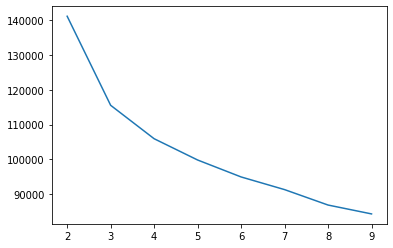

In [264]:
#incercia-kmeans: 3
l = []
for k in range(2,10):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(Xp)
    l.append((k,km.inertia_))
inercia = pd.DataFrame(l,columns=['k','inercia'])

plt.plot(inercia['k'],inercia['inercia'])

2
3
4
5
6
7
8


/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



9


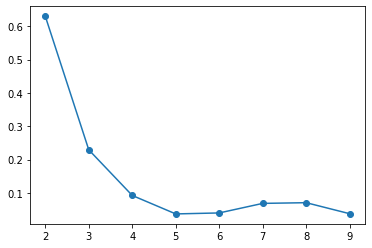

In [265]:
#silueta-gauss:
#esferica: 3  
#tied :

l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='spherical')
    
    km.fit(Xp)
    l.append((k,silhouette_score(Xp,km.predict(Xp))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


2
3
4
5
6
7
8
9


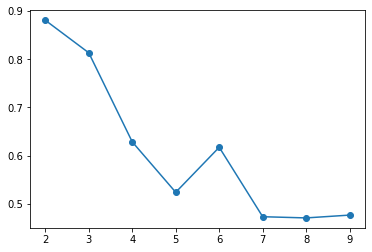

In [266]:
#Silueta-kmeans: 2,3 

l = []
for k in range(2,10):
    print(k)
    
    km = KMeans(n_clusters=k)
    
    km.fit(Xp)
    l.append((k,silhouette_score(Xp,km.predict(Xp))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')

In [267]:
#aicbic-gauss: 4
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='spherical')
    km.fit(Xp)
    l_bic.append((k,km.bic(Xp)))
    l_aic.append((k,km.aic(Xp)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



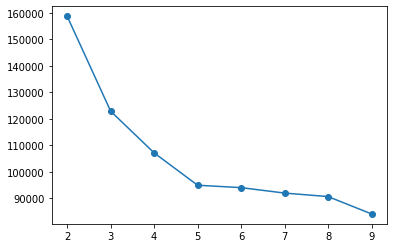

In [268]:
plt.plot(aic['k'],aic['aic'],marker='o')

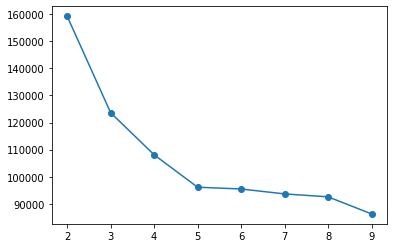

In [269]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [270]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [271]:
#davis_kmeans: 2 , 3
lst_dbscore=[]
for k in range(2,11):
    cl_db = KMeans(n_clusters=k)
    cl_db.fit(Xp)
    lst_dbscore.append(davies_bouldin_score(Xp,cl_db.predict(Xp)))

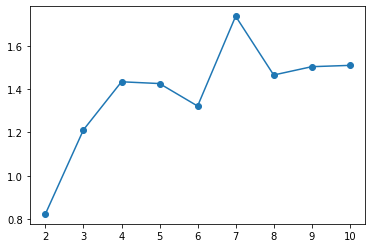

In [272]:

plt.plot(range(2,11),lst_dbscore,marker='o')

### Variación hiperarametros gauss

### Diag

2
3
4
5
6
7
8
9


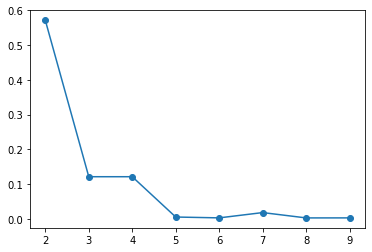

In [273]:
#silueta-gauss-diag: 2 


l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='diag')
    
    km.fit(Xp)
    l.append((k,silhouette_score(Xp,km.predict(Xp))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


In [274]:
#aicbic-gauss: 4
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='diag')
    km.fit(Xp)
    l_bic.append((k,km.bic(Xp)))
    l_aic.append((k,km.aic(Xp)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



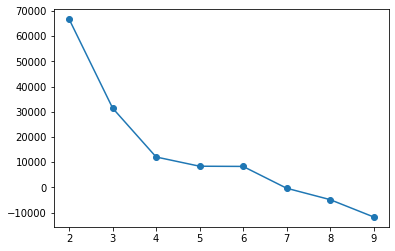

In [275]:
plt.plot(aic['k'],aic['aic'],marker='o')

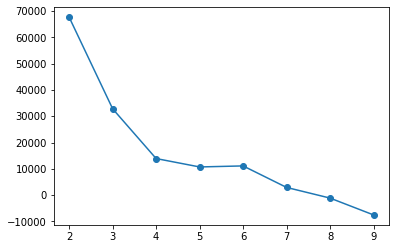

In [276]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [277]:
#gauss tied

### Tied

2
3
4
5
6
7
8
9


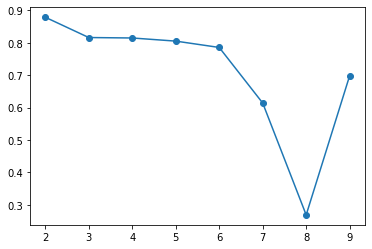

In [278]:
#silueta-gauss: 3,4,5

l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='tied')
    
    km.fit(Xp)
    l.append((k,silhouette_score(Xp,km.predict(Xp))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


In [279]:
#aicbic-gauss: 7
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='tied')
    km.fit(Xp)
    l_bic.append((k,km.bic(Xp)))
    l_aic.append((k,km.aic(Xp)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

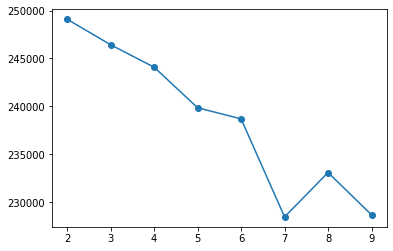

In [280]:
plt.plot(aic['k'],aic['aic'],marker='o')

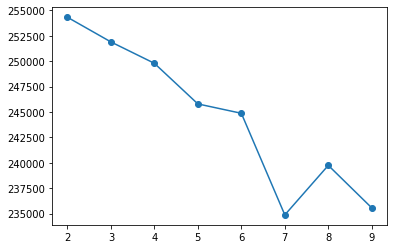

In [281]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [282]:
#gauss full

### Full

2
3
4
5
6
7
8
9


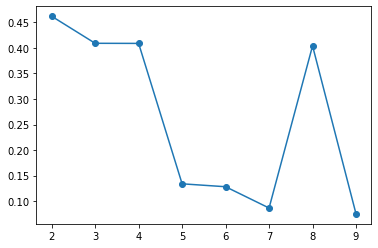

In [283]:
#silueta-gauss: 5


l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='full')
    
    km.fit(Xp)
    l.append((k,silhouette_score(Xp,km.predict(Xp))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')


In [284]:
#aicbic-gauss: 4
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k,covariance_type='full')
    km.fit(Xp)
    l_bic.append((k,km.bic(Xp)))
    l_aic.append((k,km.aic(Xp)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

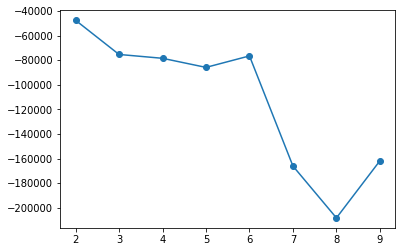

In [285]:
plt.plot(aic['k'],aic['aic'],marker='o')

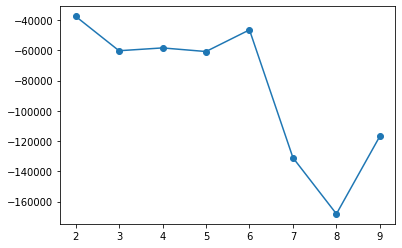

In [286]:
plt.plot(bic['k'],bic['bic'],marker='o')

### Ejemplos de los mejores

In [287]:
gmm=GaussianMixture(n_components=4,covariance_type='diag',random_state=27)

In [288]:
gmm.fit_predict(Xp)

array([1, 3, 3, ..., 1, 3, 2])

In [289]:
X["cl_gmm_diag_4"] = gmm.predict(Xp)


In [290]:
X["cl_gmm_diag_4"].value_counts(1)*100

0    39.148073
2    31.318458
3    21.257606
1     8.275862
Name: cl_gmm_diag_4, dtype: float64

#Conclusiones de escalado y transformación

Se realizó pca para obtener resultados favorables en cuanto a la distribución de los clusters, al escalar y reducir a 30 pca se consigue una variaza explicada de 95% y la distribución de los datos en cada cluster armoniza para un analisis. 

#Distribución clusters

In [291]:
X["cl_gmm_diag_4"] = gmm.predict(Xp)



In [292]:
Xp.columns

Index(['pca_comp_1', 'pca_comp_2', 'pca_comp_3', 'pca_comp_4', 'pca_comp_5',
       'pca_comp_6', 'pca_comp_7', 'pca_comp_8', 'pca_comp_9', 'pca_comp_10',
       'pca_comp_11', 'pca_comp_12', 'pca_comp_13', 'pca_comp_14',
       'pca_comp_15', 'pca_comp_16', 'pca_comp_17', 'pca_comp_18',
       'pca_comp_19', 'pca_comp_20', 'pca_comp_21', 'pca_comp_22',
       'pca_comp_23', 'pca_comp_24', 'pca_comp_25', 'pca_comp_26',
       'pca_comp_27', 'pca_comp_28', 'pca_comp_29', 'pca_comp_30',
       'pca_comp_31', 'pca_comp_32', 'pca_comp_33', 'pca_comp_34',
       'pca_comp_35', 'pca_comp_36', 'pca_comp_37', 'pca_comp_38',
       'pca_comp_39', 'pca_comp_40'],
      dtype='object')

In [293]:
Xp[['pca_comp_1', 'pca_comp_2', 'pca_comp_3', 'pca_comp_4', 'pca_comp_5',
       'pca_comp_6', 'pca_comp_7', 'pca_comp_8', 'pca_comp_9', 'pca_comp_10',
       'pca_comp_11', 'pca_comp_12', 'pca_comp_13', 'pca_comp_14',
       'pca_comp_15', 'pca_comp_16', 'pca_comp_17', 'pca_comp_18',
       'pca_comp_19', 'pca_comp_20', 'pca_comp_21', 'pca_comp_22',
       'pca_comp_23', 'pca_comp_24', 'pca_comp_25', 'pca_comp_26',
       'pca_comp_27', 'pca_comp_28', 'pca_comp_29', 'pca_comp_30',
       'pca_comp_31', 'pca_comp_32', 'pca_comp_33', 'pca_comp_34',
       'pca_comp_35', 'pca_comp_36', 'pca_comp_37', 'pca_comp_38',
       'pca_comp_39', 'pca_comp_40']]

,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,pca_comp_10,pca_comp_11,pca_comp_12,pca_comp_13,pca_comp_14,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24,pca_comp_25,pca_comp_26,pca_comp_27,pca_comp_28,pca_comp_29,pca_comp_30,pca_comp_31,pca_comp_32,pca_comp_33,pca_comp_34,pca_comp_35,pca_comp_36,pca_comp_37,pca_comp_38,pca_comp_39,pca_comp_40
0,52.904085,0.873517,9.306966,7.108966,4.085677,-1.524509,-0.205519,-3.796300,1.161969,-5.096859,-8.164869,-8.632352,-9.169668,6.248007,-1.756651,2.269856,-11.688204,6.278301,-4.902477,-6.043270,3.117549,1.536703,-1.371580,4.625643,1.229910,-0.561946,8.945257,-2.957961,0.147267,-0.459164,-4.337465,3.165496,-3.139533,-1.654064,1.323099,4.164410,-0.922773,0.102772,-1.107258,-1.481745
1,0.249785,-0.590667,0.467763,0.483119,1.213396,-1.284284,4.495515,-0.856855,-3.275401,-1.741278,0.129755,0.327527,-0.847300,-0.124172,-0.418071,-0.321806,-0.464894,0.307743,-1.272364,-0.281269,0.270962,0.303308,0.101428,0.009305,0.101943,0.589453,1.205602,-0.731286,0.290395,-0.545505,0.004224,0.296210,-0.581282,-0.506283,0.113652,-0.525576,-0.337279,0.432207,0.501338,-0.284983
2,0.743255,-1.357629,0.032798,0.898971,1.032146,-0.665521,-0.481685,-1.255134,-1.196014,0.340965,-0.482460,0.301500,-0.592695,0.006569,0.080994,-0.085512,-0.435005,0.185346,-1.080845,0.213452,0.535116,0.873714,-0.408800,-0.403319,0.319951,0.755383,0.289185,-0.642792,0.090037,0.034824,-0.288307,0.319921,0.215558,-0.358858,-0.743050,-0.021941,0.210290,0.006927,-0.001175,-0.383174
3,-1.630119,0.381022,0.397940,-0.165826,0.453686,-0.606756,-0.249374,-1.036443,-1.374263,-0.066213,0.056976,-0.139008,0.077398,0.020259,-0.314872,-0.317616,0.085472,0.064459,-0.547737,-0.236064,0.137107,-0.354569,0.226398,-0.301717,-0.111775,0.334311,0.351133,-0.196466,0.275280,0.119923,-0.119788,-0.104350,-0.381972,-0.209034,0.193267,0.153638,-0.288870,-0.123969,-0.103696,-0.113359
4,4.643519,-0.337194,0.785316,1.117678,1.011832,-0.693150,-0.659142,-1.719761,-1.153308,-0.388328,-0.127773,-0.423396,-0.642228,0.608401,-0.069633,0.138030,-0.872422,0.641553,-0.957317,-0.513040,0.693372,0.576835,-0.971283,0.156553,-0.009409,0.285543,0.626842,-0.477488,-0.430230,0.058026,-0.820188,0.301354,0.359168,-0.713576,-0.964913,0.811267,0.249315,-0.246546,0.230391,-0.368868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,-1.620415,-0.256790,0.116154,0.057320,-0.167439,-0.104779,0.032465,0.311647,0.521174,-0.458074,-0.313574,0.156429,0.262111,-0.051007,0.268129,-0.094097,-0.045889,0.070894,-0.283676,0.149017,0.252366,0.162280,0.200378,-0.324734,-0.009620,0.225024,0.183639,0.233162,-0.215610,-0.105398,-0.025436,0.135678,0.318494,0.053213,-0.428164,0.096380,-0.006051,0.052589,-0.224874,-0.228761
2461,-0.412234,-0.410109,-0.009300,-0.127805,0.619849,-0.933750,-0.750123,0.074894,-0.327916,0.188899,-0.299245,0.803964,-0.121685,0.930084,0.306483,0.360957,-0.024868,0.020491,-0.275983,0.603241,0.147763,0.542509,0.356802,0.132658,0.005573,0.660468,0.235525,-0.640943,-0.117191,-0.048777,-0.045156,-0.222464,0.103377,-0.462966,-0.851149,-0.268845,0.286868,0.040884,-0.072735,-0.075974
2462,8.496536,2.560216,2.272612,-1.195655,1.296543,-3.549649,-0.992801,2.543686,-1.901919,-0.014467,-2.770825,-0.446599,-1.836304,-0.363070,0.207872,-0.111686,-0.333905,0.228864,1.533875,1.082704,0.049411,1.768169,1.071250,-1.207130,0.699745,-0.769625,-0.899940,0.580430,1.819845,-0.389409,1.050631,1.684705,0.217906,-1.734983,0.930137,-1.350794,-1.031708,-0.134035,0.702091,0.206705
2463,-1.411937,0.386576,0.236077,-0.273627,0.028774,0.047859,-0.469877,0.128872,0.364525,-0.206577,-0.513365,0.130600,0.080402,0.216818,0.191488,0.089300,-0.226787,0.254969,-0.102640,0.152112,0.209196,0.223886,0.384387,-0.414475,-0.142333,0.056696,-0.058935,0.016062,-0.062628,0.045543,0.24942

In [294]:
vector_prob = gmm.predict_proba(Xp[['pca_comp_1', 'pca_comp_2', 'pca_comp_3', 'pca_comp_4', 'pca_comp_5',
       'pca_comp_6', 'pca_comp_7', 'pca_comp_8', 'pca_comp_9', 'pca_comp_10',
       'pca_comp_11', 'pca_comp_12', 'pca_comp_13', 'pca_comp_14',
       'pca_comp_15', 'pca_comp_16', 'pca_comp_17', 'pca_comp_18',
       'pca_comp_19', 'pca_comp_20', 'pca_comp_21', 'pca_comp_22',
       'pca_comp_23', 'pca_comp_24', 'pca_comp_25', 'pca_comp_26',
       'pca_comp_27', 'pca_comp_28', 'pca_comp_29', 'pca_comp_30',
       'pca_comp_31', 'pca_comp_32', 'pca_comp_33', 'pca_comp_34',
       'pca_comp_35', 'pca_comp_36', 'pca_comp_37', 'pca_comp_38',
       'pca_comp_39', 'pca_comp_40']]).round(3)


In [295]:
scores=gmm.score_samples(Xp[['pca_comp_1', 'pca_comp_2', 'pca_comp_3', 'pca_comp_4', 'pca_comp_5',
       'pca_comp_6', 'pca_comp_7', 'pca_comp_8', 'pca_comp_9', 'pca_comp_10',
       'pca_comp_11', 'pca_comp_12', 'pca_comp_13', 'pca_comp_14',
       'pca_comp_15', 'pca_comp_16', 'pca_comp_17', 'pca_comp_18',
       'pca_comp_19', 'pca_comp_20', 'pca_comp_21', 'pca_comp_22',
       'pca_comp_23', 'pca_comp_24', 'pca_comp_25', 'pca_comp_26',
       'pca_comp_27', 'pca_comp_28', 'pca_comp_29', 'pca_comp_30',
       'pca_comp_31', 'pca_comp_32', 'pca_comp_33', 'pca_comp_34',
       'pca_comp_35', 'pca_comp_36', 'pca_comp_37', 'pca_comp_38',
       'pca_comp_39', 'pca_comp_40']]).round(3)

In [296]:
exp_scores=np.exp(scores).round(3)

In [297]:
scores

array([-134.539,  -55.075,  -26.274, ...,  -83.492,  -17.035,   41.971])

In [298]:
exp_scores

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 1.68956031e+18])

In [299]:
vector_prob

array([[0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.   , 1.   ],
       ...,
       [0.   , 1.   , 0.   , 0.   ],
       [0.001, 0.   , 0.   , 0.999],
       [0.   , 0.   , 1.   , 0.   ]])

In [300]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[-1.82049898e+00  9.17926682e-02  7.07536057e-02 -2.18209389e-02
   2.36598449e-02 -8.23459080e-02 -2.28924342e-01 -1.53210420e-01
  -1.45160420e-01 -9.34286729e-02  9.24099859e-02  2.21828338e-02
  -2.94126732e-02 -1.39237139e-02 -7.16736673e-02 -9.52975655e-02
   4.32515593e-02 -2.22862072e-02 -4.47652477e-02 -1.63996804e-02
  -2.72301537e-02 -4.25746360e-02  7.94757523e-03 -3.55810248e-02
   8.24416092e-02  7.09590820e-02 -2.01113568e-03 -1.35955574e-01
   1.07969099e-01  1.61344753e-02 -4.13639772e-03 -9.10739124e-03
  -7.40824839e-02 -2.26700304e-02  2.34907552e-02 -1.58604525e-02
  -8.73704337e-04  2.21097249e-02 -1.86383702e-02  2.46056004e-02]
 [ 1.74105288e+01 -2.37147399e-01 -3.46344644e-01 -1.40806572e-01
   6.70155747e-01  3.22256681e-01  3.00497438e-01  4.57350190e-02
  -8.21044931e-01  4.26561282e-01  1.35324536e-01 -1.25453630e-01
   3.55471338e-01  7.02936906e-02  1.30321161e-01  2.38301695e-01
  -1.00372753e-02  2.66277729e-01  3.09447698e-01 -1.52601336e-02
   1.1425

In [301]:
gmm.means_.min()

-2.5339202145373636

In [302]:
gmm.means_.max()

17.410528751621758

In [303]:
gmm.covariances_.min()

0.000879972392482605

In [304]:
gmm.covariances_.max()

414.8337286956937

In [305]:
gmm.n_iter_

41

In [306]:
gmm.lower_bound_

-3.1476452748006922

In [307]:
gmm.n_components

4

In [308]:
type(vector_prob)

numpy.ndarray

In [309]:
vector_prob

array([[0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.   , 1.   ],
       ...,
       [0.   , 1.   , 0.   , 0.   ],
       [0.001, 0.   , 0.   , 0.999],
       [0.   , 0.   , 1.   , 0.   ]])

In [310]:
import scipy.sparse as sparse


In [311]:
arr = sparse.coo_matrix(vector_prob, shape=(2465 ,4))
X['vector_prob'] = arr.toarray().tolist()

In [312]:
X['scores'] =scores

In [313]:
X['exp_scores'] =exp_scores

In [314]:
X

,con afiliación a servicios de salud,sin afiliación a servicios de salud,casada(o),divorciada(o),separada(o),soltera(o),unión libre,viuda(o),católica,católica ortodoxa,cultos populares,espiritualista,islámica,judía,new age y escuelas esotéricas,origen oriental,otros movimientos religiosos,protestante/cristiano evangélico,raíces afro,raíces étnicas,sin religión/sin adscripción religiosa,0 hijas e hijos nacidos vivos,1 hija e hijo nacido vivo,10 hijas e hijos nacidos vivos,11 hijas e hijos nacidos vivos,12 hijas e hijos nacidos vivos,13 y más hijas e hijos nacidos vivos,2 hijas e hijos nacidos vivos,3 hijas e hijos nacidos vivos,4 hijas e hijos nacidos vivos,5 hijas e hijos nacidos vivos,6 hijas e hijos nacidos vivos,7 hijas e hijos nacidos vivos,8 hijas e hijos nacidos vivos,9 hijas e hijos nacidos vivos,educación básica,educación media superior,educación superior,sin escolaridad,con limitación,sin limitación,habla lengua indígena,no habla lengua indígena,migrante,no migrante,no sabe leer y escribir,sabe leer y escribir,asiste a la escuela,no asiste a la escuela,población económicamente activa,población no económicamente activa,UE Unidades económicas,"H001C Personal ocupado total, mujeres",H001D Horas trabajadas por personal ocupado total (miles de horas),H001A Personal ocupado total,"H010C Personal remunerado, mujeres",A534A Tasa de rentabilidad promedio (Porcentaje),A231A Margen bruto de operación (Porcentaje),A171A Remuneración media por persona ocupada remunerada (Pesos),A192A Horas diarias trabajadas en promedio por el personal remunerado (Horas diarias),A181A Indemnizaciones y liquidaciones a remuneraciones totales (Porcentaje),A154A Prestaciones sociales a total de remuneraciones (Porcentaje),A141A Participación de los salarios y sueldos en el total de remuneraciones (Porcentaje),Homicidios_mujeres,Aborto,Abuso de confianza,Abuso sexual,Acoso sexual,Allanamiento de morada,Amenazas,Contra el medio ambiente,Corrupción de menores,Daño a la propiedad,Delitos cometidos por servidores públicos,Despojo,Electorales,Evasión de presos,Extorsión,Falsedad,Falsificación,Feminicidio,Fraude,Homicidio,Hostigamiento sexual,Incesto,Incumplimiento de obligaciones de asistencia familiar,Lesiones,Narcomenudeo,Otros delitos contra el patrimonio,Otros delitos contra la familia,Otros delitos contra la sociedad,Otros delitos del Fuero Común,Otros delitos que atentan contra la libertad personal,Otros delitos que atentan contra la libertad y la seguridad sexual,Otros delitos que atentan contra la vida y la integridad corporal,Rapto,Robo,Secuestro,Trata de personas,Tráfico de menores,Violación equiparada,Violación simple,Violencia de género en todas sus modalidades distinta a la violencia familiar,Violencia familiar,cl_gmm_diag_4,vector_prob,scores,exp_scores
Cod_entidad,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01 001,324064.0,67998.0,149720.0,17348.0,18947.0,135855.0,46525.0,23742.0,346382.0,12.0,60.0,35.0,26.0,97.0,56.0,224.0,19.0,24388.0,51.0,12.0,20148.0,136214.0,47561.0,1623.0,1099.0,917.0,1163.0,71899.0,66211.0,32256.0,15009.0,7855.0,4815.0,3226.0,2175.0,190794.0,90258.0,102928.0,7582.0,85829.0,306129.0,709.0,391217.0,21666.0,370011.0,6699.0,384882.0,72858.0,319241.0,208788.0,182985.0,40547,103829.0,627590.352,260249.0,66317.0,28.184,21.987,142032.139,9.733,1.861,16.722,75.837,4.0,15.0,688.0,0.0,0.0,547.0,3545.0,47.0,45.0,3899.0,552.0,337.0,26.0,0.0,63.0,80.0,769.0,7.0,2417.0,139.0,106.0,0.0,262.0,3894.0,1277.0,216.0,32.0,2.0,1971.0,346.0,474.0,53.0,0.0,8488.0,2.0,5.0,0.0,89.0,225.0,7.0,2158.0,1,"[0.0, 1.0, 0.0, 0.0]",-134.539,0.000000e+00
01 002,17097.0,2584.0,8161.0,250.0,882.0,6168.0,3138.0,1082.0,18623.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,698.0,0.0,0.0,349.0,6150.0,2251.0,249.0,169.0,138.0,243.0,2838.0,3044.0,1754.0,1109.0,644.0,466.0,331.0,294.0,13757.0,3668.0,1688.0,552.0,3751.0,15931.0,7.0,19674.0,708.0,18962.0,607.0,19058.0,3467.0,16215.0,7142.0,12515.0,845,1177.0,8048.57

In [315]:
X["cl_gmm_diag_4"].value_counts(1)*100

0    39.148073
2    31.318458
3    21.257606
1     8.275862
Name: cl_gmm_diag_4, dtype: float64

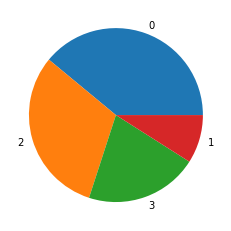

In [316]:
cluster = [0,2,3,1]
nombres = [39, 31,21,9]
plt.pie(nombres, labels=cluster)
plt.show()

In [317]:
d=pd.DataFrame()
d["cl"]=cluster
d["%"]=nombres
d

,cl,%
0,0,39
1,2,31
2,3,21
3,1,9


# Variables explicativas

In [318]:
from sklearn.tree import DecisionTreeClassifier

In [319]:
tree=DecisionTreeClassifier()

In [320]:
tree.fit(Xp,X['cl_gmm_diag_4'])

DecisionTreeClassifier()

In [321]:
importances=tree.feature_importances_

In [322]:
feature_importance= sorted(zip(importances, list(X.columns)), reverse=True)

data_tree = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(data_tree['importance'])
feature= list(data_tree['feature'])

In [323]:
data_tree

,importance,feature
0,0.481891,con afiliación a servicios de salud
1,0.124180,otros movimientos religiosos
2,0.047494,10 hijas e hijos nacidos vivos
3,0.039999,casada(o)
4,0.028833,9 hijas e hijos nacidos vivos
5,0.025585,8 hijas e hijos nacidos vivos
6,0.020297,cultos populares
7,0.018060,islámica
8,0.014345,sin escolaridad
9,0.014166,educación básica


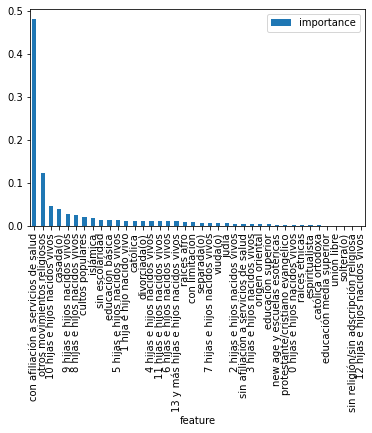

In [324]:
data_tree.plot.bar(x='feature',y='importance')

In [325]:
data_tree.to_excel('/content/drive/MyDrive/IM/Cluster por información de municipio/Variables_explicativas.xlsx',index=False)

In [326]:
varc=['con afiliación a servicios de salud',
 'sin afiliación a servicios de salud',
 'casada(o)',
 'divorciada(o)',
 'separada(o)',
 'soltera(o)',
 'unión libre',
 'viuda(o)',
 'católica',
 'católica ortodoxa',
 'cultos populares',
 'espiritualista',
 'islámica',
 'judía',
 'new age y escuelas esotéricas',
 'origen oriental',
 'otros movimientos religiosos',
 'protestante/cristiano evangélico',
 'raíces afro',
 'raíces étnicas',
 'sin religión/sin adscripción religiosa',
 '0 hijas e hijos nacidos vivos',
 '1 hija e hijo nacido vivo',
 '10 hijas e hijos nacidos vivos',
 '11 hijas e hijos nacidos vivos',
 '12 hijas e hijos nacidos vivos',
 '13 y más hijas e hijos nacidos vivos',
 '2 hijas e hijos nacidos vivos',
 '3 hijas e hijos nacidos vivos',
 '4 hijas e hijos nacidos vivos',
 '5 hijas e hijos nacidos vivos',
 '6 hijas e hijos nacidos vivos',
 '7 hijas e hijos nacidos vivos',
 '8 hijas e hijos nacidos vivos',
 '9 hijas e hijos nacidos vivos',
 'educación básica',
 'educación media superior',
 'educación superior',
 'sin escolaridad',
 'con limitación',
 'sin limitación',
 'habla lengua indígena',
 'no habla lengua indígena',
 'migrante',
 'no migrante',
 'no sabe leer y escribir',
 'sabe leer y escribir',
 'asiste a la escuela',
 'no asiste a la escuela',
 'población económicamente activa',
 'población no económicamente activa',
 'UE Unidades económicas',
 'H001C Personal ocupado total, mujeres',
 'H001D Horas trabajadas por personal ocupado total (miles de horas)',
 'H001A Personal ocupado total',
 'H010C Personal remunerado, mujeres',
 'A534A Tasa de rentabilidad promedio (Porcentaje)',
 'A231A Margen bruto de operación (Porcentaje)',
 'A171A Remuneración media por persona ocupada remunerada (Pesos)',
 'A192A Horas diarias trabajadas en promedio por el personal remunerado (Horas diarias)',
 'A181A Indemnizaciones y liquidaciones a remuneraciones totales (Porcentaje)',
 'A154A Prestaciones sociales a total de remuneraciones (Porcentaje)',
 'A141A Participación de los salarios y sueldos en el total de remuneraciones (Porcentaje)',
 'Homicidios_mujeres',
 'Aborto',
 'Abuso de confianza',
 'Abuso sexual',
 'Acoso sexual',
 'Allanamiento de morada',
 'Amenazas',
 'Contra el medio ambiente',
 'Corrupción de menores',
 'Daño a la propiedad',
 'Delitos cometidos por servidores públicos',
 'Despojo',
 'Electorales',
 'Evasión de presos',
 'Extorsión',
 'Falsedad',
 'Falsificación',
 'Feminicidio',
 'Fraude',
 'Homicidio',
 'Hostigamiento sexual',
 'Incesto',
 'Incumplimiento de obligaciones de asistencia familiar',
 'Lesiones',
 'Narcomenudeo',
 'Otros delitos contra el patrimonio',
 'Otros delitos contra la familia',
 'Otros delitos contra la sociedad',
 'Otros delitos del Fuero Común',
 'Otros delitos que atentan contra la libertad personal',
 'Otros delitos que atentan contra la libertad y la seguridad sexual',
 'Otros delitos que atentan contra la vida y la integridad corporal',
 'Rapto',
 'Robo',
 'Secuestro',
 'Trata de personas',
 'Tráfico de menores',
 'Violación equiparada',
 'Violación simple',
 'Violencia de género en todas sus modalidades distinta a la violencia familiar',
 'Violencia familiar']

In [327]:
quit=['católica ortodoxa','islámica','judía','origen oriental','otros movimientos religiosos','raíces afro','raíces étnicas',
      'A231A Margen bruto de operación (Porcentaje)','A192A Horas diarias trabajadas en promedio por el personal remunerado (Horas diarias)',
      'A181A Indemnizaciones y liquidaciones a remuneraciones totales (Porcentaje)','Delitos cometidos por servidores públicos','Narcomenudeo',
      'Otros delitos contra el patrimonio','Otros delitos contra la familia','Otros delitos contra la sociedad',
      'Otros delitos que atentan contra la vida y la integridad corporal','Rapto','Trata de personas','Tráfico de menores',
      'Violencia de género en todas sus modalidades distinta a la violencia familiar']

In [328]:
#varc = [ele for ele in varc if ele not in quit]


In [329]:
X[varc+['cl_gmm_diag_4']].groupby('cl_gmm_diag_4').mean().style.background_gradient(cmap='BuPu')

,con afiliación a servicios de salud,sin afiliación a servicios de salud,casada(o),divorciada(o),separada(o),soltera(o),unión libre,viuda(o),católica,católica ortodoxa,cultos populares,espiritualista,islámica,judía,new age y escuelas esotéricas,origen oriental,otros movimientos religiosos,protestante/cristiano evangélico,raíces afro,raíces étnicas,sin religión/sin adscripción religiosa,0 hijas e hijos nacidos vivos,1 hija e hijo nacido vivo,10 hijas e hijos nacidos vivos,11 hijas e hijos nacidos vivos,12 hijas e hijos nacidos vivos,13 y más hijas e hijos nacidos vivos,2 hijas e hijos nacidos vivos,3 hijas e hijos nacidos vivos,4 hijas e hijos nacidos vivos,5 hijas e hijos nacidos vivos,6 hijas e hijos nacidos vivos,7 hijas e hijos nacidos vivos,8 hijas e hijos nacidos vivos,9 hijas e hijos nacidos vivos,educación básica,educación media superior,educación superior,sin escolaridad,con limitación,sin limitación,habla lengua indígena,no habla lengua indígena,migrante,no migrante,no sabe leer y escribir,sabe leer y escribir,asiste a la escuela,no asiste a la escuela,población económicamente activa,población no económicamente activa,UE Unidades económicas,"H001C Personal ocupado total, mujeres",H001D Horas trabajadas por personal ocupado total (miles de horas),H001A Personal ocupado total,"H010C Personal remunerado, mujeres",A534A Tasa de rentabilidad promedio (Porcentaje),A231A Margen bruto de operación (Porcentaje),A171A Remuneración media por persona ocupada remunerada (Pesos),A192A Horas diarias trabajadas en promedio por el personal remunerado (Horas diarias),A181A Indemnizaciones y liquidaciones a remuneraciones totales (Porcentaje),A154A Prestaciones sociales a total de remuneraciones (Porcentaje),A141A Participación de los salarios y sueldos en el total de remuneraciones (Porcentaje),Homicidios_mujeres,Aborto,Abuso de confianza,Abuso sexual,Acoso sexual,Allanamiento de morada,Amenazas,Contra el medio ambiente,Corrupción de menores,Daño a la propiedad,Delitos cometidos por servidores públicos,Despojo,Electorales,Evasión de presos,Extorsión,Falsedad,Falsificación,Feminicidio,Fraude,Homicidio,Hostigamiento sexual,Incesto,Incumplimiento de obligaciones de asistencia familiar,Lesiones,Narcomenudeo,Otros delitos contra el patrimonio,Otros delitos contra la familia,Otros delitos contra la sociedad,Otros delitos del Fuero Común,Otros delitos que atentan contra la libertad personal,Otros delitos que atentan contra la libertad y la seguridad sexual,Otros delitos que atentan contra la vida y la integridad corporal,Rapto,Robo,Secuestro,Trata de personas,Tráfico de menores,Violación equiparada,Violación simple,Violencia de género en todas sus modalidades distinta a la violencia familiar,Violencia familiar
cl_gmm_diag_4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5184.315026,1730.776166,2502.849741,82.343005,439.961658,1976.798964,1360.003109,553.985492,5701.364767,0.071503,0.509845,1.431088,0.090155,0.689119,0.181347,0.252850,0.051813,805.978238,0.233161,0.835233,400.122280,2041.395855,865.702591,72.091192,42.023834,38.060104,37.867358,1194.050777,1063.207254,586.976166,349.512953,235.760622,165.688083,129.391710,91.935751,4333.997927,1261.436269,730.863212,581.892228,1526.258031,5389.938860,790.098446,6125.308808,319.179275,6592.335751,630.587565,6277.754404,1067.918135,5847.625907,2860.404145,4040.194819,633.386528,828.984456,4176.821699,1847.353368,322.154404,29.623203,21.725126,66786.738568,9.454285,1.442410,8.450629,89.646964,0.153368,0.040415,2.163731,2.451813,0.527461,1.404145,12.240415,0.217617,0.112953,13.803109,1.375130,4.631088,0.575130,0.000000,0.862176,0.268394,0.925389,0.141969,5.968912,7.344041,0.219689,0.000000,2.321244,20.516062,4.244560,1.070466,1.243523,0.553368,15.926425,1.855959,1.117098,0.958549,0.003109,37.075648,0.081865,0.032124,0.000000,0.650777,1.537824,0.687047,19.451813
1,117534.676471,37428.647059,51949.083333,4781.142157,10290.397059,51040.181373

In [330]:
X[varc+['cl_gmm_diag_4']].groupby('cl_gmm_diag_4').mean().to_csv("/content/drive/MyDrive/IM/Cluster por información de municipio/perfilamiento_4_clusters.csv",index=True)

In [331]:
aux=X[varc+['cl_gmm_diag_4']].groupby('cl_gmm_diag_4').mean()

In [332]:
fig = go.Figure()

for i,row in aux.iterrows():
    fig.add_trace(go.Scatterpolar(r=row.values,
                                  theta=varc,
                                  fill='toself',
                                  name=f'cluster {i}'))
fig.show()

In [333]:
ls_res = []
for feature in aux.columns:
    l = []
    for cl in X["cl_gmm_diag_4"].unique():
        l.append(X.loc[X["cl_gmm_diag_4"]==cl, feature].to_list())
    kr = kruskal(*l)
    ls_res.append((feature,kr.pvalue))

In [334]:
data_kruskal=pd.DataFrame(ls_res,columns=['Feature','p_value']).round(3)

In [335]:
data_kruskal

,Feature,p_value
0,con afiliación a servicios de salud,0.0
1,sin afiliación a servicios de salud,0.0
2,casada(o),0.0
3,divorciada(o),0.0
4,separada(o),0.0
...,...,...
99,Tráfico de menores,0.0
100,Violación equiparada,0.0
101,Violación simple,0.0
102,Violencia de género en todas sus modalidades d...,0.0


In [336]:
variables_cambio=data_kruskal[data_kruskal['p_value']<.05]['Feature'].to_list()

In [337]:
len(varc)

104

In [338]:
len(variables_cambio)

104

In [339]:
from statsmodels.stats.multicomp import MultiComparison

In [340]:
for v in variables_cambio:
    print(v)
    mc = MultiComparison(X[v],X['cl_gmm_diag_4'])
    display(mc.tukeyhsd().summary())
    print('\n')

con afiliación a servicios de salud


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,112350.3614,0.001,105347.17,119353.5529,True
0,2,-3803.5391,0.1161,-8191.8267,584.7485,False
0,3,12128.7823,0.001,7197.2086,17060.356,True
1,2,-116153.9006,0.001,-123308.2254,-108999.5757,True
1,3,-100221.5791,0.001,-107721.4268,-92721.7314,True
2,3,15932.3214,0.001,10788.3838,21076.259,True




sin afiliación a servicios de salud


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,35697.8709,0.001,33268.8325,38126.9093,True
0,2,-1342.8591,0.1059,-2864.925,179.2069,False
0,3,4247.783,0.001,2537.2797,5958.2863,True
1,2,-37040.73,0.001,-39522.1886,-34559.2713,True
1,3,-31450.0879,0.001,-34051.3902,-28848.7856,True
2,3,5590.6421,0.001,3806.4809,7374.8032,True




casada(o)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,49446.2336,0.001,46358.6953,52533.7719,True
0,2,-1837.0181,0.07,-3771.7084,97.6721,False
0,3,5683.051,0.001,3508.839,7857.263,True
1,2,-51283.2517,0.001,-54437.4211,-48129.0823,True
1,3,-43763.1826,0.001,-47069.6847,-40456.6805,True
2,3,7520.0692,0.001,5252.231,9787.9073,True




divorciada(o)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,4698.7992,0.001,4382.343,5015.2553,True
0,2,-70.4376,0.7726,-268.7329,127.8578,False
0,3,321.9223,0.0012,99.0772,544.7673,True
1,2,-4769.2367,0.001,-5092.5222,-4445.9513,True
1,3,-4376.8769,0.001,-4715.7756,-4037.9781,True
2,3,392.3598,0.001,159.9186,624.8011,True




separada(o)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,9850.4354,0.001,9200.9807,10499.8901,True
0,2,-335.9552,0.1463,-742.9116,71.0013,False
0,3,1079.5918,0.001,622.2526,1536.9309,True
1,2,-10186.3906,0.001,-10849.8609,-9522.9203,True
1,3,-8770.8436,0.001,-9466.3567,-8075.3306,True
2,3,1415.547,0.001,938.5138,1892.5801,True




soltera(o)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,49063.3824,0.001,45884.8567,52241.9081,True
0,2,-1477.163,0.2256,-3468.867,514.5411,False
0,3,5037.1228,0.001,2798.8384,7275.4072,True
1,2,-50540.5454,0.001,-53787.6657,-47293.425,True
1,3,-44026.2596,0.001,-47430.2018,-40622.3174,True
2,3,6514.2857,0.001,4179.6162,8848.9553,True




unión libre


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,24940.9332,0.001,23377.5267,26504.3396,True
0,2,-1026.4759,0.0358,-2006.126,-46.8258,True
0,3,3111.0332,0.001,2010.0988,4211.9675,True
1,2,-25967.4091,0.001,-27564.5549,-24370.2633,True
1,3,-21829.9,0.001,-23504.181,-20155.619,True
2,3,4137.5091,0.001,2989.1661,5285.852,True




viuda(o)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,10091.7939,0.001,9421.0926,10762.4953,True
0,2,-399.9725,0.069,-820.2424,20.2973,False
0,3,1148.9782,0.001,676.6774,1621.2791,True
1,2,-10491.7665,0.001,-11176.942,-9806.5909,True
1,3,-8942.8157,0.001,-9661.0822,-8224.5491,True
2,3,1548.9508,0.001,1056.3117,2041.5899,True




católica


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,114390.9539,0.001,106995.1097,121786.798,True
0,2,-4232.1433,0.0877,-8866.472,402.1855,False
0,3,13072.1181,0.001,7864.0424,18280.1937,True
1,2,-118623.0971,0.001,-126178.5484,-111067.6458,True
1,3,-101318.8358,0.001,-109239.1826,-93398.489,True
2,3,17304.2613,0.001,11871.9151,22736.6076,True




católica ortodoxa


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,9.8109,0.001,8.6911,10.9306,True
0,2,-0.0637,0.9,-0.7654,0.6379,False
0,3,0.2911,0.7525,-0.4974,1.0796,False
1,2,-9.8746,0.001,-11.0185,-8.7307,True
1,3,-9.5198,0.001,-10.7189,-8.3206,True
2,3,0.3548,0.6627,-0.4676,1.1773,False




cultos populares


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,26.6421,0.001,24.432,28.8522,True
0,2,-0.4373,0.8295,-1.8222,0.9476,False
0,3,2.0131,0.005,0.4567,3.5694,True
1,2,-27.0794,0.001,-29.3372,-24.8216,True
1,3,-24.6291,0.001,-26.9959,-22.2622,True
2,3,2.4504,0.001,0.827,4.0737,True




espiritualista


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,58.2748,0.001,51.7293,64.8203,True
0,2,-1.1422,0.8833,-5.2437,2.9593,False
0,3,6.6052,0.0013,1.9959,11.2145,True
1,2,-59.417,0.001,-66.1038,-52.7302,True
1,3,-51.6696,0.001,-58.6794,-44.6599,True
2,3,7.7474,0.001,2.9396,12.5552,True




islámica


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,11.0716,0.001,10.0479,12.0953,True
0,2,-0.0759,0.9,-0.7174,0.5656,False
0,3,0.4824,0.3135,-0.2385,1.2033,False
1,2,-11.1475,0.001,-12.1933,-10.1017,True
1,3,-10.5892,0.001,-11.6856,-9.4929,True
2,3,0.5583,0.2247,-0.1937,1.3102,False




judía


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,105.0805,0.001,76.8985,133.2625,True
0,2,-0.5181,0.9,-18.1773,17.1411,False
0,3,3.0571,0.9,-16.7884,22.9025,False
1,2,-105.5986,0.001,-134.3888,-76.8085,True
1,3,-102.0234,0.001,-132.204,-71.8428,True
2,3,3.5752,0.9,-17.1248,24.2752,False




new age y escuelas esotéricas


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,16.549,0.001,15.231,17.8671,True
0,2,-0.1606,0.9,-0.9865,0.6653,False
0,3,0.979,0.0341,0.0508,1.9071,True
1,2,-16.7097,0.001,-18.0562,-15.3631,True
1,3,-15.5701,0.001,-16.9816,-14.1585,True
2,3,1.1396,0.0134,0.1714,2.1077,True




origen oriental


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,57.105,0.001,50.6641,63.5459,True
0,2,-0.2231,0.9,-4.259,3.8129,False
0,3,2.1708,0.5946,-2.3648,6.7064,False
1,2,-57.3281,0.001,-63.908,-50.7481,True
1,3,-54.9342,0.001,-61.8319,-48.0365,True
2,3,2.3939,0.5551,-2.3371,7.1248,False




otros movimientos religiosos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,6.708,0.001,5.4038,8.0122,True
0,2,-0.044,0.9,-0.8612,0.7732,False
0,3,0.2764,0.8508,-0.6419,1.1948,False
1,2,-6.752,0.001,-8.0843,-5.4197,True
1,3,-6.4316,0.001,-7.8282,-5.0349,True
2,3,0.3205,0.8024,-0.6375,1.2784,False




protestante/cristiano evangélico


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,17219.9776,0.001,16111.931,18328.0243,True
0,2,-591.9899,0.1255,-1286.3058,102.326,False
0,3,2033.5523,0.001,1253.2775,2813.8271,True
1,2,-17811.9675,0.001,-18943.9266,-16680.0085,True
1,3,-15186.4253,0.001,-16373.0531,-13999.7976,True
2,3,2625.5422,0.001,1811.6671,3439.4173,True




raíces afro


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,71.9678,0.001,62.1975,81.7381,True
0,2,-0.215,0.9,-6.3372,5.9072,False
0,3,1.9176,0.883,-4.9625,8.7977,False
1,2,-72.1828,0.001,-82.164,-62.2017,True
1,3,-70.0502,0.001,-80.5134,-59.587,True
2,3,2.1326,0.8564,-5.0438,9.309,False




raíces étnicas


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,38.5765,0.001,23.5052,53.6478,True
0,2,-0.5878,0.9,-10.0317,8.8561,False
0,3,4.3174,0.6982,-6.2956,14.9305,False
1,2,-39.1644,0.001,-54.5609,-23.7678,True
1,3,-34.2591,0.001,-50.3992,-18.1189,True
2,3,4.9053,0.6458,-6.1648,15.9753,False




sin religión/sin adscripción religiosa


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,15909.9267,0.001,14741.913,17077.9405,True
0,2,-316.0005,0.6622,-1047.8926,415.8915,False
0,3,1242.2079,0.001,419.7049,2064.7108,True
1,2,-16225.9273,0.001,-17419.1475,-15032.707,True
1,3,-14667.7189,0.001,-15918.5664,-13416.8713,True
2,3,1558.2084,0.001,700.2867,2416.1301,True




0 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,49468.8492,0.001,46308.3876,52629.3108,True
0,2,-1521.1472,0.1979,-3501.532,459.2377,False
0,3,5149.003,0.001,2923.4392,7374.5668,True
1,2,-50989.9964,0.001,-54218.6628,-47761.33,True
1,3,-44319.8462,0.001,-47704.4432,-40935.2492,True
2,3,6670.1502,0.001,4348.7489,8991.5514,True




1 hija e hijo nacido vivo


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,20891.8905,0.001,19593.2206,22190.5605,True
0,2,-650.3153,0.1688,-1464.0781,163.4476,False
0,3,2168.347,0.001,1253.8373,3082.8567,True
1,2,-21542.2058,0.001,-22868.9019,-20215.5098,True
1,3,-18723.5435,0.001,-20114.3132,-17332.7738,True
2,3,2818.6623,0.001,1864.7719,3772.5527,True




10 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,483.3598,0.001,449.4171,517.3024,True
0,2,-49.2207,0.001,-70.4896,-27.9518,True
0,3,124.6779,0.001,100.7758,148.5799,True
1,2,-532.5805,0.001,-567.2557,-497.9054,True
1,3,-358.6819,0.001,-395.0317,-322.3321,True
2,3,173.8986,0.001,148.9673,198.8299,True




11 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,270.3879,0.001,250.0847,290.6911,True
0,2,-29.6417,0.001,-42.3639,-16.9195,True
0,3,71.2758,0.001,56.9785,85.5731,True
1,2,-300.0296,0.001,-320.771,-279.2883,True
1,3,-199.1121,0.001,-220.8552,-177.3691,True
2,3,100.9175,0.001,86.0045,115.8305,True




12 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,231.2977,0.001,213.6666,248.9289,True
0,2,-27.0756,0.001,-38.1236,-16.0277,True
0,3,64.6823,0.001,52.2666,77.098,True
1,2,-258.3734,0.001,-276.3851,-240.3617,True
1,3,-166.6155,0.001,-185.497,-147.7339,True
2,3,91.7579,0.001,78.8076,104.7082,True




13 y más hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,246.6866,0.001,225.1217,268.2514,True
0,2,-28.7145,0.001,-42.2273,-15.2017,True
0,3,65.562,0.001,50.3763,80.7478,True
1,2,-275.4011,0.001,-297.4313,-253.3708,True
1,3,-181.1245,0.001,-204.2187,-158.0303,True
2,3,94.2765,0.001,78.4369,110.1162,True




2 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,30915.3365,0.001,28982.904,32847.7689,True
0,2,-908.8358,0.216,-2119.7222,302.0507,False
0,3,3059.1133,0.001,1698.3147,4419.912,True
1,2,-31824.1722,0.001,-33798.3079,-29850.0366,True
1,3,-27856.2231,0.001,-29925.7009,-25786.7453,True
2,3,3967.9491,0.001,2548.5517,5387.3465,True




3 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,24322.8761,0.001,22800.9552,25844.797,True
0,2,-813.7358,0.1251,-1767.3905,139.919,False
0,3,2567.3481,0.001,1495.6274,3639.0688,True
1,2,-25136.6118,0.001,-26691.3768,-23581.8469,True
1,3,-21755.528,0.001,-23385.3813,-20125.6747,True
2,3,3381.0838,0.001,2263.2126,4498.955,True




4 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,10417.5729,0.001,9754.4695,11080.6762,True
0,2,-436.4425,0.0352,-851.9514,-20.9336,True
0,3,1265.6517,0.001,798.7013,1732.6021,True
1,2,-10854.0153,0.001,-11531.4289,-10176.6017,True
1,3,-9151.9212,0.001,-9862.0509,-8441.7914,True
2,3,1702.0942,0.001,1215.0359,2189.1525,True




5 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,4843.3057,0.001,4531.6909,5154.9205,True
0,2,-250.807,0.0054,-446.0687,-55.5453,True
0,3,700.739,0.001,481.3031,920.1748,True
1,2,-5094.1127,0.001,-5412.4523,-4775.773,True
1,3,-4142.5667,0.001,-4476.2808,-3808.8527,True
2,3,951.5459,0.001,722.6607,1180.4312,True




6 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2604.357,0.001,2436.9671,2771.747,True
0,2,-164.7023,0.001,-269.591,-59.8137,True
0,3,447.1974,0.001,329.3232,565.0716,True
1,2,-2769.0594,0.001,-2940.0617,-2598.057,True
1,3,-2157.1596,0.001,-2336.4206,-1977.8986,True
2,3,611.8997,0.001,488.9496,734.8499,True




7 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1535.6845,0.001,1435.8348,1635.5342,True
0,2,-113.7179,0.001,-176.2849,-51.1508,True
0,3,300.7337,0.001,230.4206,371.0468,True
1,2,-1649.4023,0.001,-1751.4069,-1547.3978,True
1,3,-1234.9508,0.001,-1341.8817,-1128.0199,True
2,3,414.4515,0.001,341.1106,487.7925,True




8 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1055.0838,0.001,985.5456,1124.622,True
0,2,-88.1909,0.001,-131.7645,-44.6174,True
0,3,232.1732,0.001,183.2051,281.1413,True
1,2,-1143.2747,0.001,-1214.3136,-1072.2358,True
1,3,-822.9106,0.001,-897.3804,-748.4408,True
2,3,320.3641,0.001,269.2874,371.4409,True




9 hijas e hijos nacidos vivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,667.2162,0.001,621.6797,712.7527,True
0,2,-62.5951,0.001,-91.1288,-34.0613,True
0,3,157.7799,0.001,125.7135,189.8462,True
1,2,-729.8113,0.001,-776.3305,-683.292,True
1,3,-509.4363,0.001,-558.2022,-460.6704,True
2,3,220.375,0.001,186.9278,253.8222,True




educación básica


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,69527.7227,0.001,65191.2726,73864.1727,True
0,2,-3174.6806,0.0143,-5891.9546,-457.4066,True
0,3,9211.399,0.001,6157.7165,12265.0815,True
1,2,-72702.4032,0.001,-77132.4367,-68272.3698,True
1,3,-60316.3236,0.001,-64960.3085,-55672.3388,True
2,3,12386.0796,0.001,9200.8992,15571.26,True




educación media superior


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,36042.1716,0.001,33707.3623,38376.9809,True
0,2,-971.685,0.32,-2434.7058,491.3358,False
0,3,3347.8481,0.001,1703.6999,4991.9962,True
1,2,-37013.8565,0.001,-39399.0526,-34628.6605,True
1,3,-32694.3235,0.001,-35194.7141,-30193.9328,True
2,3,4319.5331,0.001,2604.5844,6034.4817,True




educación superior


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,37673.2299,0.001,35074.3923,40272.0675,True
0,2,-598.5394,0.7548,-2227.0036,1029.9249,False
0,3,2610.3849,0.0014,780.3108,4440.459,True
1,2,-38271.7693,0.001,-40926.6915,-35616.8471,True
1,3,-35062.845,0.001,-37845.9885,-32279.7016,True
2,3,3208.9243,0.001,1300.0434,5117.8052,True




sin escolaridad


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,4610.0539,0.001,4302.8274,4917.2803,True
0,2,-395.7212,0.001,-588.2332,-203.2093,True
0,3,1192.6249,0.001,976.2793,1408.9706,True
1,2,-5005.7751,0.001,-5319.6317,-4691.9185,True
1,3,-3417.4289,0.001,-3746.4434,-3088.4144,True
2,3,1588.3462,0.001,1362.6843,1814.0081,True




con limitación


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,28514.8106,0.001,26691.9238,30337.6974,True
0,2,-1100.2541,0.064,-2242.4979,41.9896,False
0,3,3201.387,0.001,1917.7293,4485.0447,True
1,2,-29615.0647,0.001,-31477.2906,-27752.8388,True
1,3,-25313.4236,0.001,-27265.5869,-23361.2603,True
2,3,4301.6412,0.001,2962.7065,5640.5758,True




sin limitación


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,119587.0464,0.001,112131.2904,127042.8024,True
0,2,-4046.9868,0.1164,-8718.857,624.8835,False
0,3,13180.9657,0.001,7930.7008,18431.2307,True
1,2,-123634.0332,0.001,-131250.6893,-116017.3771,True
1,3,-106406.0807,0.001,-114390.5882,-98421.5732,True
2,3,17227.9525,0.001,11751.6002,22704.3048,True




habla lengua indígena


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,3915.4996,0.001,3288.1045,4542.8946,True
0,2,-381.9275,0.0606,-775.0611,11.2062,False
0,3,1574.6191,0.001,1132.8141,2016.4241,True
1,2,-4297.4271,0.001,-4938.3617,-3656.4924,True
1,3,-2340.8805,0.001,-3012.7695,-1668.9915,True
2,3,1956.5466,0.001,1495.7165,2417.3766,True




no habla lengua indígena


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,144126.7353,0.001,134926.6835,153326.7871,True
0,2,-4764.6456,0.1455,-10529.5135,1000.2223,False
0,3,14805.0194,0.001,8326.4398,21283.5991,True
1,2,-148891.3809,0.001,-158289.9758,-139492.786,True
1,3,-129321.7159,0.001,-139174.2221,-119469.2096,True
2,3,19569.665,0.001,12812.1042,26327.2258,True




migrante


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,9507.4531,0.001,8865.0147,10149.8914,True
0,2,-235.9565,0.435,-638.5164,166.6034,False
0,3,825.3494,0.001,372.951,1277.7477,True
1,2,-9743.4096,0.001,-10399.7121,-9087.107,True
1,3,-8682.1037,0.001,-9370.1029,-7994.1046,True
2,3,1061.3058,0.001,589.4263,1533.1854,True




no migrante


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,138346.0956,0.001,129591.5846,147100.6066,True
0,2,-4907.5184,0.0983,-10393.2048,578.1681,False
0,3,15541.2482,0.001,9376.4136,21706.0828,True
1,2,-143253.614,0.001,-152197.0531,-134310.1749,True
1,3,-122804.8474,0.001,-132180.2158,-113429.479,True
2,3,20448.7666,0.001,14018.4614,26879.0718,True




no sabe leer y escribir


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,4009.5252,0.001,3728.011,4291.0393,True
0,2,-410.7883,0.001,-587.1886,-234.388,True
0,3,1221.6949,0.001,1023.4556,1419.9342,True
1,2,-4420.3135,0.001,-4707.9029,-4132.7241,True
1,3,-2787.8303,0.001,-3089.309,-2486.3516,True
2,3,1632.4832,0.001,1425.7073,1839.2591,True




sabe leer y escribir


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,143819.2995,0.001,134763.5093,152875.0898,True
0,2,-4729.985,0.1399,-10404.4568,944.4868,False
0,3,15140.1464,0.001,8763.1541,21517.1386,True
1,2,-148549.2845,0.001,-157800.5046,-139298.0644,True
1,3,-128679.1532,0.001,-138377.1671,-118981.1393,True
2,3,19870.1313,0.001,13218.5325,26521.7301,True




asiste a la escuela


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,25823.0181,0.001,24191.9889,27454.0473,True
0,2,-812.5762,0.1724,-1834.5995,209.4472,False
0,3,2759.9693,0.001,1611.4157,3908.5229,True
1,2,-26635.5943,0.001,-28301.8222,-24969.3664,True
1,3,-23063.0489,0.001,-24809.7483,-21316.3494,True
2,3,3572.5454,0.001,2374.5327,4770.5582,True




no asiste a la escuela


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,122222.7613,0.001,114610.923,129834.5997,True
0,2,-4334.1337,0.0902,-9103.8071,435.5397,False
0,3,13620.2462,0.001,8260.0697,18980.4227,True
1,2,-126556.895,0.001,-134333.0018,-118780.7882,True
1,3,-108602.5151,0.001,-116754.1741,-100450.8561,True
2,3,17954.3799,0.001,12363.3831,23545.3768,True




población económicamente activa


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,78062.9929,0.001,73104.8625,83021.1233,True
0,2,-2269.285,0.2379,-5376.1117,837.5418,False
0,3,8035.76,0.001,4544.2967,11527.2233,True
1,2,-80332.2779,0.001,-85397.408,-75267.1478,True
1,3,-70027.2329,0.001,-75336.9868,-64717.479,True
2,3,10305.045,0.001,6663.232,13946.8579,True




población no económicamente activa


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,69829.516,0.001,65525.0772,74133.9547,True
0,2,-2866.9085,0.0321,-5564.1239,-169.6932,True
0,3,8316.4979,0.001,5285.3574,11347.6384,True
1,2,-72696.4245,0.001,-77093.7559,-68299.0931,True
1,3,-61513.018,0.001,-66122.7214,-56903.3146,True
2,3,11183.4065,0.001,8021.7387,14345.0742,True




UE Unidades económicas


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,13576.7507,0.001,12638.5746,14514.9269,True
0,2,-453.5277,0.1945,-1041.4007,134.3452,False
0,3,1563.5982,0.001,902.9444,2224.252,True
1,2,-14030.2784,0.001,-14988.7011,-13071.8558,True
1,3,-12013.1525,0.001,-13017.8628,-11008.4423,True
2,3,2017.1259,0.001,1328.023,2706.2288,True




H001C Personal ocupado total, mujeres


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,40185.0597,0.001,36940.559,43429.5603,True
0,2,-640.3692,0.8307,-2673.414,1392.6757,False
0,3,2762.4926,0.0103,477.7494,5047.2359,True
1,2,-40825.4288,0.001,-44139.9479,-37510.9097,True
1,3,-37422.567,0.001,-40897.163,-33947.971,True
2,3,3402.8618,0.0014,1019.7328,5785.9909,True




H001D Horas trabajadas por personal ocupado total (miles de horas)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,241142.8805,0.001,221732.9315,260552.8294,True
0,2,-3412.2776,0.8803,-15574.7952,8750.24,False
0,3,15623.194,0.0175,1954.9121,29291.4759,True
1,2,-244555.1581,0.001,-264383.9864,-224726.3297,True
1,3,-225519.6864,0.001,-246306.1611,-204733.2118,True
2,3,19035.4716,0.0034,4778.605,33292.3382,True




H001A Personal ocupado total


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,99422.7398,0.001,91341.0971,107504.3825,True
0,2,-1481.3197,0.8631,-6545.3784,3582.739,False
0,3,6565.8413,0.0161,874.8335,12256.8491,True
1,2,-100904.0595,0.001,-109160.1093,-92648.0096,True
1,3,-92856.8985,0.001,-101511.6797,-84202.1173,True
2,3,8047.161,0.0028,2111.0866,13983.2354,True




H010C Personal remunerado, mujeres


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,24924.3652,0.001,22692.8985,27155.8319,True
0,2,-285.4951,0.9,-1683.7601,1112.77,False
0,3,1407.6777,0.0975,-163.6977,2979.0531,False
1,2,-25209.8603,0.001,-27489.4835,-22930.237,True
1,3,-23516.6875,0.001,-25906.4067,-21126.9684,True
2,3,1693.1727,0.0398,54.1306,3332.2148,True




A534A Tasa de rentabilidad promedio (Porcentaje)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,12.9726,0.001,7.5792,18.366,True
0,2,4.9156,0.0011,1.5361,8.2952,True
0,3,2.9383,0.1924,-0.8597,6.7362,False
1,2,-8.057,0.001,-13.5667,-2.5472,True
1,3,-10.0343,0.001,-15.8102,-4.2585,True
2,3,-1.9774,0.565,-5.9389,1.9841,False




A231A Margen bruto de operación (Porcentaje)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.8137,0.7324,-1.3104,2.9379,False
0,2,2.8541,0.001,1.5231,4.1851,True
0,3,1.3915,0.0791,-0.1043,2.8873,False
1,2,2.0404,0.0742,-0.1296,4.2104,False
1,3,0.5778,0.9,-1.697,2.8526,False
2,3,-1.4626,0.0756,-3.0228,0.0977,False




A171A Remuneración media por persona ocupada remunerada (Pesos)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,51206.4614,0.001,43893.8287,58519.0942,True
0,2,-23553.257,0.001,-28135.4445,-18971.0696,True
0,3,19316.0426,0.001,14166.5635,24465.5216,True
1,2,-74759.7185,0.001,-82230.1626,-67289.2743,True
1,3,-31890.4189,0.001,-39721.6531,-24059.1847,True
2,3,42869.2996,0.001,37498.0732,48240.526,True




A192A Horas diarias trabajadas en promedio por el personal remunerado (Horas diarias)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.2309,0.4505,-0.6317,0.1699,False
0,2,-0.7761,0.001,-1.0272,-0.5249,True
0,3,0.1171,0.6865,-0.1651,0.3993,False
1,2,-0.5452,0.0035,-0.9546,-0.1357,True
1,3,0.348,0.1585,-0.0812,0.7772,False
2,3,0.8932,0.001,0.5988,1.1876,True




A181A Indemnizaciones y liquidaciones a remuneraciones totales (Porcentaje)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,23.4253,0.001,11.0956,35.7549,True
0,2,-1.0676,0.9,-8.7935,6.6583,False
0,3,2.6968,0.837,-5.9856,11.3792,False
1,2,-24.4929,0.001,-37.0886,-11.8972,True
1,3,-20.7285,0.001,-33.9325,-7.5245,True
2,3,3.7644,0.6854,-5.2919,12.8207,False




A154A Prestaciones sociales a total de remuneraciones (Porcentaje)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,3.5976,0.001,2.6941,4.5011,True
0,2,-6.71,0.001,-7.2762,-6.1439,True
0,3,0.8302,0.0045,0.194,1.4664,True
1,2,-10.3076,0.001,-11.2306,-9.3846,True
1,3,-2.7674,0.001,-3.735,-1.7998,True
2,3,7.5402,0.001,6.8766,8.2039,True




A141A Participación de los salarios y sueldos en el total de remuneraciones (Porcentaje)


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-8.8933,0.001,-11.9357,-5.8508,True
0,2,1.932,0.0456,0.0255,3.8384,True
0,3,-3.0051,0.0018,-5.1476,-0.8626,True
1,2,10.8252,0.001,7.7171,13.9333,True
1,3,5.8882,0.001,2.6299,9.1464,True
2,3,-4.9371,0.001,-7.1718,-2.7023,True




Homicidios_mujeres


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,6.0721,0.001,5.3151,6.8292,True
0,2,-0.1339,0.8777,-0.6083,0.3404,False
0,3,0.6615,0.0079,0.1284,1.1946,True
1,2,-6.2061,0.001,-6.9794,-5.4327,True
1,3,-5.4106,0.001,-6.2213,-4.5999,True
2,3,0.7955,0.0014,0.2394,1.3515,True




Aborto


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,3.6017,0.001,3.2308,3.9727,True
0,2,-0.0404,0.9,-0.2729,0.192,False
0,3,0.1867,0.2562,-0.0746,0.4479,False
1,2,-3.6422,0.001,-4.0211,-3.2632,True
1,3,-3.4151,0.001,-3.8123,-3.0178,True
2,3,0.2271,0.14,-0.0454,0.4996,False




Abuso de confianza


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,141.2922,0.001,126.9898,155.5945,True
0,2,-1.8256,0.9,-10.7877,7.1364,False
0,3,9.8859,0.0566,-0.1857,19.9574,False
1,2,-143.1178,0.001,-157.7288,-128.5068,True
1,3,-131.4063,0.001,-146.7229,-116.0896,True
2,3,11.7115,0.0218,1.2063,22.2168,True




Abuso sexual


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,127.009,0.001,117.4599,136.558,True
0,2,-2.0839,0.7826,-8.0675,3.8996,False
0,3,8.197,0.0095,1.4727,14.9214,True
1,2,-129.0929,0.001,-138.848,-119.3378,True
1,3,-118.8119,0.001,-129.0382,-108.5857,True
2,3,10.281,0.001,3.2671,17.2949,True




Acoso sexual


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,34.0363,0.001,30.5384,37.5341,True
0,2,-0.4225,0.9,-2.6143,1.7693,False
0,3,1.879,0.2032,-0.5841,4.3422,False
1,2,-34.4588,0.001,-38.0322,-30.8854,True
1,3,-32.1572,0.001,-35.9032,-28.4113,True
2,3,2.3016,0.0976,-0.2677,4.8708,False




Allanamiento de morada


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,59.1645,0.001,50.7854,67.5435,True
0,2,-1.1736,0.9,-6.424,4.0768,False
0,3,4.9852,0.1312,-0.9153,10.8856,False
1,2,-60.3381,0.001,-68.8979,-51.7782,True
1,3,-54.1793,0.001,-63.1526,-45.206,True
2,3,6.1587,0.0498,0.0042,12.3133,True




Amenazas


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,511.0047,0.001,468.3227,553.6867,True
0,2,-9.607,0.7669,-36.3521,17.1381,False
0,3,45.292,0.001,15.2358,75.3483,True
1,2,-520.6117,0.001,-564.2148,-477.0085,True
1,3,-465.7127,0.001,-511.4216,-420.0037,True
2,3,54.899,0.001,23.5485,86.2495,True




Contra el medio ambiente


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,8.6991,0.001,7.4063,9.9918,True
0,2,-0.1891,0.9,-0.9992,0.6209,False
0,3,0.9198,0.0466,0.0094,1.8301,True
1,2,-8.8882,0.001,-10.2088,-7.5675,True
1,3,-7.7793,0.001,-9.1637,-6.3948,True
2,3,1.1089,0.0144,0.1594,2.0584,True




Corrupción de menores


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,13.5782,0.001,10.9968,16.1596,True
0,2,-0.0935,0.9,-1.7111,1.524,False
0,3,0.5435,0.8537,-1.2743,2.3613,False
1,2,-13.6717,0.001,-16.3089,-11.0346,True
1,3,-13.0347,0.001,-15.7992,-10.2702,True
2,3,0.6371,0.8004,-1.259,2.5331,False




Daño a la propiedad


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,597.6283,0.001,551.2859,643.9706,True
0,2,-11.5363,0.7119,-40.575,17.5024,False
0,3,49.5595,0.001,16.9257,82.1933,True
1,2,-609.1645,0.001,-656.507,-561.8221,True
1,3,-548.0688,0.001,-597.6976,-498.4399,True
2,3,61.0958,0.001,27.0567,95.1348,True




Delitos cometidos por servidores públicos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,103.1494,0.001,89.6303,116.6684,True
0,2,-0.9956,0.9,-9.4668,7.4756,False
0,3,4.9149,0.5403,-4.605,14.4349,False
1,2,-104.145,0.001,-117.9558,-90.3342,True
1,3,-98.2344,0.001,-112.7122,-83.7566,True
2,3,5.9105,0.421,-4.0194,15.8405,False




Despojo


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,122.9915,0.001,114.1581,131.8248,True
0,2,-3.5158,0.3609,-9.0509,2.0193,False
0,3,12.014,0.001,5.7936,18.2343,True
1,2,-126.5073,0.001,-135.5312,-117.4833,True
1,3,-110.9775,0.001,-120.4373,-101.5177,True
2,3,15.5298,0.001,9.0415,22.018,True




Electorales


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,9.0768,0.001,8.1799,9.9737,True
0,2,-0.3951,0.2702,-0.9571,0.1669,False
0,3,1.194,0.001,0.5624,1.8255,True
1,2,-9.4719,0.001,-10.3882,-8.5556,True
1,3,-7.8829,0.001,-8.8434,-6.9224,True
2,3,1.589,0.001,0.9302,2.2478,True




Evasión de presos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.5931,0.001,0.5067,0.6796,True
0,2,0.0,0.9,-0.0542,0.0542,False
0,3,0.0592,0.0604,-0.0017,0.12,False
1,2,-0.5931,0.001,-0.6814,-0.5048,True
1,3,-0.534,0.001,-0.6265,-0.4414,True
2,3,0.0592,0.0783,-0.0043,0.1226,False




Extorsión


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,38.9172,0.001,35.3855,42.449,True
0,2,-0.765,0.7864,-2.9781,1.448,False
0,3,3.1035,0.0074,0.6164,5.5905,True
1,2,-39.6823,0.001,-43.2902,-36.0743,True
1,3,-35.8138,0.001,-39.596,-32.0315,True
2,3,3.8685,0.001,1.2744,6.4626,True




Falsedad


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,18.3051,0.001,15.9247,20.6855,True
0,2,-0.201,0.9,-1.6926,1.2905,False
0,3,1.1992,0.2553,-0.4771,2.8754,False
1,2,-18.5062,0.001,-20.9379,-16.0744,True
1,3,-17.106,0.001,-19.6552,-14.5568,True
2,3,1.4002,0.1673,-0.3482,3.1486,False




Falsificación


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,73.903,0.001,65.521,82.2851,True
0,2,-0.7725,0.9,-6.0248,4.4798,False
0,3,4.441,0.2141,-1.4615,10.3436,False
1,2,-74.6756,0.001,-83.2385,-66.1126,True
1,3,-69.462,0.001,-78.4385,-60.4855,True
2,3,5.2136,0.1298,-0.9432,11.3703,False




Feminicidio


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,3.5002,0.001,3.2524,3.748,True
0,2,-0.1381,0.1015,-0.2934,0.0172,False
0,3,0.4744,0.001,0.2999,0.649,True
1,2,-3.6383,0.001,-3.8914,-3.3851,True
1,3,-3.0257,0.001,-3.2911,-2.7603,True
2,3,0.6125,0.001,0.4305,0.7946,True




Fraude


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,463.5262,0.001,420.8674,506.185,True
0,2,-5.0596,0.9,-31.7901,21.671,False
0,3,26.2467,0.1114,-3.7932,56.2866,False
1,2,-468.5858,0.001,-512.1652,-425.0063,True
1,3,-437.2794,0.001,-482.9636,-391.5953,True
2,3,31.3063,0.0503,-0.0272,62.6398,False




Homicidio


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,150.8618,0.001,136.4274,165.2963,True
0,2,-5.9231,0.3328,-14.9679,3.1218,False
0,3,18.5319,0.001,8.3673,28.6965,True
1,2,-156.7849,0.001,-171.5309,-142.0389,True
1,3,-132.3299,0.001,-147.7881,-116.8718,True
2,3,24.455,0.001,13.8526,35.0573,True




Hostigamiento sexual


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,8.5156,0.001,7.3476,9.6837,True
0,2,-0.1756,0.9,-0.9076,0.5563,False
0,3,0.8757,0.0317,0.0532,1.6983,True
1,2,-8.6913,0.001,-9.8845,-7.498,True
1,3,-7.6399,0.001,-8.8908,-6.389,True
2,3,1.0514,0.009,0.1934,1.9093,True




Incesto


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0539,0.001,0.0388,0.0691,True
0,2,0.0,0.9,-0.0095,0.0095,False
0,3,0.0,0.9,-0.0107,0.0107,False
1,2,-0.0539,0.001,-0.0694,-0.0384,True
1,3,-0.0539,0.001,-0.0702,-0.0377,True
2,3,0.0,0.9,-0.0111,0.0111,False




Incumplimiento de obligaciones de asistencia familiar


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,93.6984,0.001,85.1154,102.2813,True
0,2,-2.0311,0.7403,-7.4093,3.3471,False
0,3,10.7799,0.001,4.7359,16.8239,True
1,2,-95.7295,0.001,-104.4976,-86.9613,True
1,3,-82.9185,0.001,-92.1101,-73.7268,True
2,3,12.811,0.001,6.5067,19.1153,True




Lesiones


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,825.3369,0.001,762.457,888.2167,True
0,2,-17.0614,0.6604,-56.4627,22.3399,False
0,3,84.5087,0.001,40.2294,128.7881,True
1,2,-842.3983,0.001,-906.6351,-778.1614,True
1,3,-740.8281,0.001,-808.1673,-673.4889,True
2,3,101.5701,0.001,55.3841,147.7562,True




Narcomenudeo


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,429.9466,0.001,321.628,538.2652,True
0,2,-3.9661,0.9,-71.8399,63.9077,False
0,3,18.7612,0.9,-57.5157,95.038,False
1,2,-433.9127,0.001,-544.5689,-323.2565,True
1,3,-411.1855,0.001,-527.1859,-295.185,True
2,3,22.7272,0.873,-56.8342,102.2887,False




Otros delitos contra el patrimonio


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,71.4344,0.001,61.4214,81.4474,True
0,2,-0.8477,0.9,-7.1219,5.4266,False
0,3,3.4734,0.5744,-3.5776,10.5245,False
1,2,-72.2821,0.001,-82.5112,-62.053,True
1,3,-67.961,0.001,-78.6841,-57.2379,True
2,3,4.3211,0.4328,-3.0336,11.6758,False




Otros delitos contra la familia


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,65.0065,0.001,55.7575,74.2555,True
0,2,-1.057,0.9,-6.8525,4.7386,False
0,3,3.5599,0.4963,-2.9532,10.073,False
1,2,-66.0635,0.001,-75.5121,-56.6149,True
1,3,-61.4466,0.001,-71.3515,-51.5416,True
2,3,4.6169,0.2997,-2.1766,11.4104,False




Otros delitos contra la sociedad


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,38.5643,0.001,32.7741,44.3545,True
0,2,-0.4536,0.9,-4.0818,3.1746,False
0,3,2.4314,0.4193,-1.646,6.5088,False
1,2,-39.0179,0.001,-44.9331,-33.1027,True
1,3,-36.1329,0.001,-42.3338,-29.9321,True
2,3,2.885,0.3014,-1.368,7.138,False




Otros delitos del Fuero Común


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,885.0442,0.001,797.3577,972.7307,True
0,2,-14.249,0.9,-69.1944,40.6965,False
0,3,73.9362,0.0113,12.1883,135.6841,True
1,2,-899.2931,0.001,-988.8719,-809.7143,True
1,3,-811.108,0.001,-905.0131,-717.2029,True
2,3,88.1851,0.0025,23.7782,152.592,True




Otros delitos que atentan contra la libertad personal


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,96.6833,0.001,89.3111,104.0554,True
0,2,-1.5969,0.7864,-6.2164,3.0226,False
0,3,6.5753,0.0063,1.3839,11.7667,True
1,2,-98.2801,0.001,-105.8114,-90.7489,True
1,3,-90.1079,0.001,-98.0029,-82.2129,True
2,3,8.1722,0.001,2.7573,13.5872,True




Otros delitos que atentan contra la libertad y la seguridad sexual


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,50.3045,0.001,44.5053,56.1036,True
0,2,-0.9345,0.9,-4.5683,2.6994,False
0,3,4.1215,0.0469,0.0378,8.2051,True
1,2,-51.2389,0.001,-57.1632,-45.3146,True
1,3,-46.183,0.001,-52.3934,-39.9726,True
2,3,5.0559,0.0123,0.7964,9.3155,True




Otros delitos que atentan contra la vida y la integridad corporal


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,56.8013,0.001,48.7404,64.8621,True
0,2,-0.8031,0.9,-5.8541,4.2479,False
0,3,4.0529,0.2569,-1.6235,9.7293,False
1,2,-57.6044,0.001,-65.8392,-49.3695,True
1,3,-52.7484,0.001,-61.3809,-44.1158,True
2,3,4.856,0.1507,-1.0648,10.7768,False




Rapto


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.639,0.001,0.506,0.7721,True
0,2,-0.0031,0.9,-0.0865,0.0802,False
0,3,0.0274,0.8627,-0.0662,0.1211,False
1,2,-0.6422,0.001,-0.778,-0.5063,True
1,3,-0.6116,0.001,-0.7541,-0.4692,True
2,3,0.0305,0.8342,-0.0672,0.1282,False




Robo


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2902.2969,0.001,2657.5908,3147.003,True
0,2,-32.0562,0.9,-185.3922,121.2797,False
0,3,189.7564,0.0242,17.4369,362.0759,True
1,2,-2934.3531,0.001,-3184.3402,-2684.3661,True
1,3,-2712.5405,0.001,-2974.6008,-2450.4801,True
2,3,221.8126,0.0083,42.0727,401.5526,True




Secuestro


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2.1534,0.001,1.925,2.3819,True
0,2,-0.0819,0.4572,-0.225,0.0613,False
0,3,0.3723,0.001,0.2114,0.5332,True
1,2,-2.2353,0.001,-2.4687,-2.0019,True
1,3,-1.7811,0.001,-2.0258,-1.5364,True
2,3,0.4542,0.001,0.2864,0.622,True




Trata de personas


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,3.3159,0.001,2.8703,3.7615,True
0,2,-0.0321,0.9,-0.3114,0.2471,False
0,3,0.174,0.4842,-0.1398,0.4878,False
1,2,-3.348,0.001,-3.8033,-2.8928,True
1,3,-3.1419,0.001,-3.6191,-2.6647,True
2,3,0.2061,0.3689,-0.1212,0.5334,False




Tráfico de menores


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.152,0.001,0.1254,0.1785,True
0,2,0.0,0.9,-0.0167,0.0167,False
0,3,0.0,0.9,-0.0187,0.0187,False
1,2,-0.152,0.001,-0.1791,-0.1248,True
1,3,-0.152,0.001,-0.1804,-0.1235,True
2,3,0.0,0.9,-0.0195,0.0195,False




Violación equiparada


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,26.0894,0.001,23.5316,28.6472,True
0,2,-0.5161,0.8206,-2.1188,1.0867,False
0,3,2.1507,0.0116,0.3496,3.9519,True
1,2,-26.6055,0.001,-29.2185,-23.9925,True
1,3,-23.9387,0.001,-26.6779,-21.1994,True
2,3,2.6668,0.0015,0.7881,4.5456,True




Violación simple


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,63.4622,0.001,58.5491,68.3752,True
0,2,-1.2477,0.7004,-4.3263,1.8309,False
0,3,5.3648,0.001,1.9051,8.8246,True
1,2,-64.7098,0.001,-69.7289,-59.6907,True
1,3,-58.0973,0.001,-63.3588,-52.8358,True
2,3,6.6125,0.001,3.0038,10.2212,True




Violencia de género en todas sus modalidades distinta a la violencia familiar


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,28.4061,0.001,23.4994,33.3128,True
0,2,-0.6301,0.9,-3.7046,2.4445,False
0,3,2.4771,0.2535,-0.9782,5.9323,False
1,2,-29.0361,0.001,-34.0487,-24.0236,True
1,3,-25.929,0.001,-31.1837,-20.6744,True
2,3,3.1071,0.1192,-0.4969,6.7111,False




Violencia familiar


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1138.4992,0.001,1057.8563,1219.142,True
0,2,-16.1202,0.8249,-66.652,34.4116,False
0,3,79.7009,0.0018,22.913,136.4887,True
1,2,-1154.6194,0.001,-1237.0026,-1072.2362,True
1,3,-1058.7983,0.001,-1145.1603,-972.4364,True
2,3,95.8211,0.001,36.5878,155.0543,True


In [341]:
from sklearn.decomposition import PCA

In [342]:
Xp

,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,pca_comp_10,pca_comp_11,pca_comp_12,pca_comp_13,pca_comp_14,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24,pca_comp_25,pca_comp_26,pca_comp_27,pca_comp_28,pca_comp_29,pca_comp_30,pca_comp_31,pca_comp_32,pca_comp_33,pca_comp_34,pca_comp_35,pca_comp_36,pca_comp_37,pca_comp_38,pca_comp_39,pca_comp_40
0,52.904085,0.873517,9.306966,7.108966,4.085677,-1.524509,-0.205519,-3.796300,1.161969,-5.096859,-8.164869,-8.632352,-9.169668,6.248007,-1.756651,2.269856,-11.688204,6.278301,-4.902477,-6.043270,3.117549,1.536703,-1.371580,4.625643,1.229910,-0.561946,8.945257,-2.957961,0.147267,-0.459164,-4.337465,3.165496,-3.139533,-1.654064,1.323099,4.164410,-0.922773,0.102772,-1.107258,-1.481745
1,0.249785,-0.590667,0.467763,0.483119,1.213396,-1.284284,4.495515,-0.856855,-3.275401,-1.741278,0.129755,0.327527,-0.847300,-0.124172,-0.418071,-0.321806,-0.464894,0.307743,-1.272364,-0.281269,0.270962,0.303308,0.101428,0.009305,0.101943,0.589453,1.205602,-0.731286,0.290395,-0.545505,0.004224,0.296210,-0.581282,-0.506283,0.113652,-0.525576,-0.337279,0.432207,0.501338,-0.284983
2,0.743255,-1.357629,0.032798,0.898971,1.032146,-0.665521,-0.481685,-1.255134,-1.196014,0.340965,-0.482460,0.301500,-0.592695,0.006569,0.080994,-0.085512,-0.435005,0.185346,-1.080845,0.213452,0.535116,0.873714,-0.408800,-0.403319,0.319951,0.755383,0.289185,-0.642792,0.090037,0.034824,-0.288307,0.319921,0.215558,-0.358858,-0.743050,-0.021941,0.210290,0.006927,-0.001175,-0.383174
3,-1.630119,0.381022,0.397940,-0.165826,0.453686,-0.606756,-0.249374,-1.036443,-1.374263,-0.066213,0.056976,-0.139008,0.077398,0.020259,-0.314872,-0.317616,0.085472,0.064459,-0.547737,-0.236064,0.137107,-0.354569,0.226398,-0.301717,-0.111775,0.334311,0.351133,-0.196466,0.275280,0.119923,-0.119788,-0.104350,-0.381972,-0.209034,0.193267,0.153638,-0.288870,-0.123969,-0.103696,-0.113359
4,4.643519,-0.337194,0.785316,1.117678,1.011832,-0.693150,-0.659142,-1.719761,-1.153308,-0.388328,-0.127773,-0.423396,-0.642228,0.608401,-0.069633,0.138030,-0.872422,0.641553,-0.957317,-0.513040,0.693372,0.576835,-0.971283,0.156553,-0.009409,0.285543,0.626842,-0.477488,-0.430230,0.058026,-0.820188,0.301354,0.359168,-0.713576,-0.964913,0.811267,0.249315,-0.246546,0.230391,-0.368868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,-1.620415,-0.256790,0.116154,0.057320,-0.167439,-0.104779,0.032465,0.311647,0.521174,-0.458074,-0.313574,0.156429,0.262111,-0.051007,0.268129,-0.094097,-0.045889,0.070894,-0.283676,0.149017,0.252366,0.162280,0.200378,-0.324734,-0.009620,0.225024,0.183639,0.233162,-0.215610,-0.105398,-0.025436,0.135678,0.318494,0.053213,-0.428164,0.096380,-0.006051,0.052589,-0.224874,-0.228761
2461,-0.412234,-0.410109,-0.009300,-0.127805,0.619849,-0.933750,-0.750123,0.074894,-0.327916,0.188899,-0.299245,0.803964,-0.121685,0.930084,0.306483,0.360957,-0.024868,0.020491,-0.275983,0.603241,0.147763,0.542509,0.356802,0.132658,0.005573,0.660468,0.235525,-0.640943,-0.117191,-0.048777,-0.045156,-0.222464,0.103377,-0.462966,-0.851149,-0.268845,0.286868,0.040884,-0.072735,-0.075974
2462,8.496536,2.560216,2.272612,-1.195655,1.296543,-3.549649,-0.992801,2.543686,-1.901919,-0.014467,-2.770825,-0.446599,-1.836304,-0.363070,0.207872,-0.111686,-0.333905,0.228864,1.533875,1.082704,0.049411,1.768169,1.071250,-1.207130,0.699745,-0.769625,-0.899940,0.580430,1.819845,-0.389409,1.050631,1.684705,0.217906,-1.734983,0.930137,-1.350794,-1.031708,-0.134035,0.702091,0.206705
2463,-1.411937,0.386576,0.236077,-0.273627,0.028774,0.047859,-0.469877,0.128872,0.364525,-0.206577,-0.513365,0.130600,0.080402,0.216818,0.191488,0.089300,-0.226787,0.254969,-0.102640,0.152112,0.209196,0.223886,0.384387,-0.414475,-0.142333,0.056696,-0.058935,0.016062,-0.062628,0.045543,0.24942

In [343]:
#n_components = 2
#pca = PCA(n_components=n_components)
#Xpca = pd.DataFrame(pca.fit_transform(X),columns=[f"p_{i}" for i in  range(1,n_components+1)])
#pca.explained_variance_ratio_.cumsum()

In [344]:
import seaborn as sns

In [345]:
current_palette = sns.color_palette()

In [346]:
pred_y=X["cl_gmm_diag_4"].to_list()

In [347]:
Xp['cl'] =pred_y

In [348]:
Xp['cl'] = Xp['cl'].astype(str)

In [349]:
#visualización 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



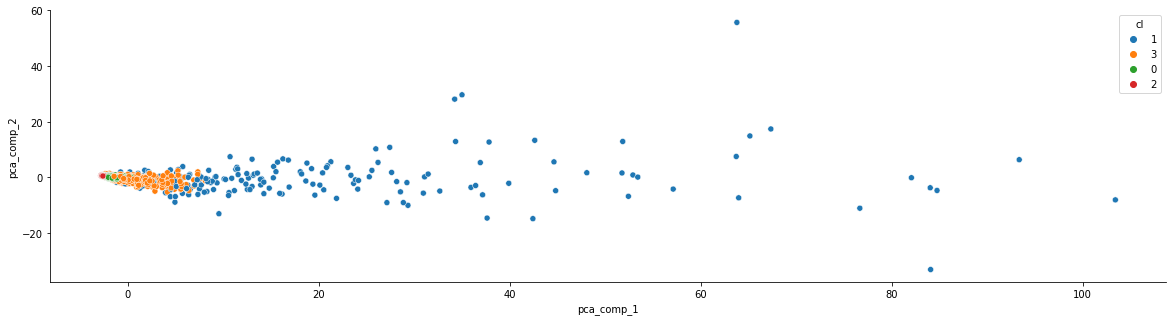

In [350]:
plt.subplots(figsize=(20,5))
sns.scatterplot(Xp["pca_comp_1"], Xp["pca_comp_2"],hue=Xp['cl'])
sns.despine()
plt.show()

In [351]:
#TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



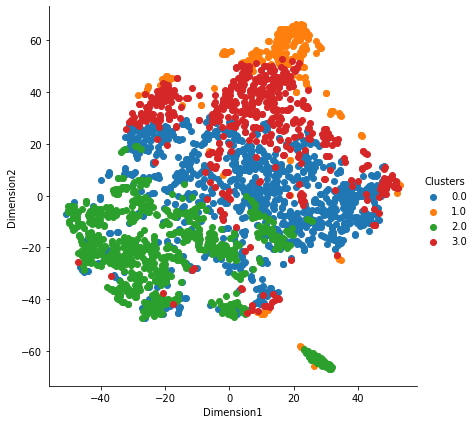

In [352]:
# save the clusters into a variable l.
l = X['cl_gmm_diag_4']
d = X[varc]
standardized_data = StandardScaler().fit_transform(d)

# TSNE Picking the top 100000points as TSNE
data_points = standardized_data[0:100000, :]
labels_80 = l[0:100000]
 
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(data_points)
 
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_80)).T
tsne_df = pd.DataFrame(data = tsne_data,
columns =("Dimension1", "Dimension2", "Clusters"))
 
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue ="Clusters", size = 6).map(
plt.scatter, 'Dimension1', 'Dimension2').add_legend()
 
plt.show()

# Perfilamiento

01
202 Donde está mi target? 


In [353]:
df_ex=pd.read_csv("/content/drive/MyDrive/IM/Modelo/df_exp_ing_var.csv")

In [354]:
#cota solo primeros créditos

In [355]:
df_ex["numero_de_credito"].value_counts()


1    427
2     72
3     25
Name: numero_de_credito, dtype: int64

In [356]:

df_ex=df_ex.sort_values(["id","numero_de_credito"],ascending=False).drop_duplicates(subset=["id"], keep='last')

In [357]:
df_ex.reset_index(inplace=True,drop=True)

In [358]:
df_ex.shape

(427, 197)

In [359]:
df_ex

,Unnamed: 0,nombre,fecha_de_nacimiento,ciudad,estado,colonia,municipio,codigo_postal,banco,la_cuenta_de_banco_esta_a_tu_nombre,el_beneficiario_de_la_tarjeta_es,monto_solicitado,interes,lider,grupo,tiempo_test,analista_asignado,referencia_1,tipo_referencia_1,tiempo_referencia_1,referencia_2,tipo_referencia_2,tiempo_referencia_2,tgt,numero_de_credito,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52,p53,p54,p55,edad,edad_list,llave,id,con afiliación a servicios de salud,sin afiliación a servicios de salud,casada(o),divorciada(o),separada(o),soltera(o),unión libre,viuda(o),católica,católica ortodoxa,cultos populares,espiritualista,islámica,judía,new age y escuelas esotéricas,origen oriental,otros movimientos religiosos,protestante/cristiano evangélico,raíces afro,raíces étnicas,sin religión/sin adscripción religiosa,0 hijas e hijos nacidos vivos,1 hija e hijo nacido vivo,10 hijas e hijos nacidos vivos,11 hijas e hijos nacidos vivos,12 hijas e hijos nacidos vivos,13 y más hijas e hijos nacidos vivos,2 hijas e hijos nacidos vivos,3 hijas e hijos nacidos vivos,4 hijas e hijos nacidos vivos,5 hijas e hijos nacidos vivos,6 hijas e hijos nacidos vivos,7 hijas e hijos nacidos vivos,8 hijas e hijos nacidos vivos,9 hijas e hijos nacidos vivos,educación básica,educación media superior,educación superior,sin escolaridad,con limitación,sin limitación,habla lengua indígena,no habla lengua indígena,migrante,no migrante,no sabe leer y escribir,sabe leer y escribir,asiste a la escuela,no asiste a la escuela,población económicamente activa,población no económicamente activa,Homicidios_mujeres,Aborto,Abuso de confianza,Abuso sexual,Acoso sexual,Allanamiento de morada,Amenazas,Contra el medio ambiente,Corrupción de menores,Daño a la propiedad,Delitos cometidos por servidores públicos,Despojo,Electorales,Evasión de presos,Extorsión,Falsedad,Falsificación,Feminicidio,Fraude,Homicidio,Hostigamiento sexual,Incesto,Incumplimiento de obligaciones de asistencia familiar,Lesiones,Narcomenudeo,Otros delitos contra el patrimonio,Otros delitos contra la familia,Otros delitos contra la sociedad,Otros delitos del Fuero Común,Otros delitos que atentan contra la libertad personal,Otros delitos que atentan contra la libertad y la seguridad sexual,Otros delitos que atentan contra la vida y la integridad corporal,Rapto,Robo,Secuestro,Trata de personas,Tráfico de menores,Violación equiparada,Violación simple,Violencia de género en todas sus modalidades distinta a la violencia familiar,Violencia familiar,index,UE Unidades económicas,"H001C Personal ocupado total, mujeres",H001D Horas trabajadas por personal ocupado total (miles de horas),H001A Personal ocupado total,"H010C Personal remunerado, mujeres",A534A Tasa de rentabilidad promedio (Porcentaje),A231A Margen bruto de operación (Porcentaje),A171A Remuneración media por persona ocupada remunerada (Pesos),A192A Horas diarias trabajadas en promedio por el personal remunerado (Horas diarias),A181A Indemnizaciones y liquidaciones a remuneraciones totales (Porcentaje),A154A Prestaciones sociales a total de remuneraciones (Porcentaje),A141A Participación de los salarios y sueldos en el total de remuneraciones (Porcentaje),D_mnpio,d_estado,d_ciudad,promedio_ingreso_p10,percent_deuda,pagos_monto_solicitado,monto_pagadero_mensual,percent_pago_vs_salario
0,129,Diana Laura Uribe Bravo,1994-05-10,Ciudad de México,Ciudad de México,Pueblo los reyes,Coyoacán,4330,Banco Nacional de México (BANAMEX),0,b,5000.0,0.047917,0,Flores de los Reyes,12.05,Edgar Cortes Cruz,1,a,6.0,1,a,10.0,1,1,b,c,b,a,b,b,b,c,f,b,a,c,b,d,g,b,c,b,c,b,b,a,b,a,b,a,a,d,a,f,d,d,a,b,b,c,a,c,b,f,c,f,e,c,d,c,d,a,d,b,b,e,a,a,c,28.0,[28.0],4330[28.0],1313,3385.0,1482.0,641.0,33.0,220.0,2759.0,1206.0,10.0,3428.0,0.0,0.0,4.0,0.0,5.0,2.0,5.0,1.0,326.0,6.0,0.0,1081.0,3082.0,925.0,0.0,0.0,0.0,0.0,663.0,159.0,32.0,5.0,0.0,0.0,

In [360]:
df_ex=df_ex[["nombre","codigo_postal","grupo","monto_solicitado"]]

In [361]:
def clean_text(text, pattern="[^a-zA-Z0-9 ]"):
    text=str(text)
    #para lidiar con acentos
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    #para obtenerlo e UTF-8, la misma codificación que tiene python
    cleaned_text = re.sub(pattern, " ", cleaned_text.decode("utf-8"), flags=re.UNICODE)
    #eliminar espacio antes y al final del string
    cleaned_text = u' '.join(cleaned_text.lower().strip().lstrip().split())
    return cleaned_text if cleaned_text!="nan" else np.nan

In [362]:
df_ex["nombre"]=df_ex["nombre"].map(lambda x: clean_text(x))

In [363]:
df_ex["grupo"]=df_ex["grupo"].map(lambda x: clean_text(x))

In [364]:
df_ex["llave"]=df_ex["nombre"].astype(str)
#df_ex["llave"]=df_ex["nombre"].astype(str)+","+df_ex["grupo"].astype(str)+","+df_ex["monto_solicitado"].astype(str)

In [365]:
df_ex

,nombre,codigo_postal,grupo,monto_solicitado,llave
0,diana laura uribe bravo,4330,flores de los reyes,5000.0,diana laura uribe bravo
1,maria dolores noguez castillo,14040,flores de los reyes,5000.0,maria dolores noguez castillo
2,maria teresa torres altamirano,4330,flores de los reyes,5000.0,maria teresa torres altamirano
3,maria del pilar belmont mendez,4330,flores de los reyes,5000.0,maria del pilar belmont mendez
4,sandra perez martinez,4330,flores de los reyes,5000.0,sandra perez martinez
...,...,...,...,...,...
422,rosa lorena vargas hinojosa,9140,grupo 9849ac2ae4c5,5000.0,rosa lorena vargas hinojosa
423,martha chavez gaona,55236,las queens,5000.0,martha chavez gaona
424,ana karen martines vargas,55236,grupo 4869187ff11e,5000.0,ana karen martines vargas
425,elizabeth nava perez,55264,las queens,5000.0,elizabeth nava perez


In [366]:
tipo_cliente=pd.read_csv("/content/drive/MyDrive/IM/Reportes/Outputs/df_exp_validacion.csv")

In [367]:
tipo_cliente["numero_de_credito"].value_counts()

0    575
1    114
2     46
3     19
4      4
Name: numero_de_credito, dtype: int64

In [368]:
tipo_cliente=tipo_cliente.sort_values(["id","numero_de_credito"],ascending=False).drop_duplicates(subset=["id"], keep='last')

In [369]:
tipo_cliente.reset_index(inplace=True,drop=True)

In [370]:
tipo_cliente.shape

(575, 325)

In [371]:
tipo_cliente["nombre"]=tipo_cliente["nombre"].map(lambda x: clean_text(x))

In [372]:
tipo_cliente["grupo"]=tipo_cliente["grupo"].map(lambda x: clean_text(x))

In [373]:
tipo_cliente["monto_solicitado"]=tipo_cliente["monto_solicitado"].map(lambda x: x.replace(",","").strip()).astype(float)

In [374]:
tipo_cliente["llave"]=tipo_cliente["nombre"].astype(str)
#tipo_cliente["llave"]=tipo_cliente["nombre"].astype(str)+","+tipo_cliente["grupo"].astype(str)+","+tipo_cliente["monto_solicitado"].astype(str)

In [375]:
tipo_cliente["monto_solicitado"].value_counts()

5000.0     411
2000.0     130
10000.0     13
3000.0       9
3500.0       4
4000.0       3
4500.0       2
7000.0       1
2500.0       1
8000.0       1
Name: monto_solicitado, dtype: int64

In [376]:
tipo_cliente["monto_solicitado"].isnull().sum()

0

In [377]:
tipo_cliente[["cond_cliente_malo_flag","cond_cliente_bueno_flag","cond_atraso_flag","cred_terminado"]]

,cond_cliente_malo_flag,cond_cliente_bueno_flag,cond_atraso_flag,cred_terminado
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
570,0,0,0,1
571,0,0,0,1
572,0,0,0,1
573,0,0,0,1


In [378]:
tipo_cliente["cond_cliente_bueno_flag"].value_counts()

0    555
1     20
Name: cond_cliente_bueno_flag, dtype: int64

In [379]:
tipo_cliente["cond_atraso_flag"].value_counts()

0    509
1     66
Name: cond_atraso_flag, dtype: int64

In [380]:
tipo_cliente["cond_cliente_malo_flag"].value_counts()

1    328
0    247
Name: cond_cliente_malo_flag, dtype: int64

In [381]:
tipo_cliente.shape

(575, 326)

In [382]:
merge_df=df_ex.merge(tipo_cliente, on="llave")

In [383]:
merge_df.shape

(427, 330)

In [384]:
select_df=merge_df[["id","nombre_x","codigo_postal_y","cond_cliente_malo_flag","cond_cliente_bueno_flag","cond_atraso_flag","cred_terminado"]]

In [385]:
select_df["cond_cliente_bueno_flag"].value_counts()

0    427
Name: cond_cliente_bueno_flag, dtype: int64

In [386]:
select_df["cred_terminado"].value_counts()

0    281
1    146
Name: cred_terminado, dtype: int64

In [387]:
select_df

,id,nombre_x,codigo_postal_y,cond_cliente_malo_flag,cond_cliente_bueno_flag,cond_atraso_flag,cred_terminado
0,1313,diana laura uribe bravo,04330,1,0,0,0
1,1304,maria dolores noguez castillo,14040,1,0,0,0
2,1300,maria teresa torres altamirano,04330,1,0,0,0
3,1299,maria del pilar belmont mendez,04330,1,0,0,0
4,1295,sandra perez martinez,04330,1,0,0,0
...,...,...,...,...,...,...,...
422,16,rosa lorena vargas hinojosa,09140,0,0,0,1
423,15,martha chavez gaona,55236,0,0,0,1
424,14,ana karen martines vargas,55236,0,0,0,1
425,13,elizabeth nava perez,55264,0,0,0,1


In [388]:
llave_variables_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31757 entries, 0 to 31756
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cod_entidad  31757 non-null  object
 1   Municipio    31757 non-null  object
 2   Estado       31757 non-null  object
 3   llave        31757 non-null  object
 4   d_codigo     31757 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [389]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 0 to 426
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       427 non-null    int64 
 1   nombre_x                 427 non-null    object
 2   codigo_postal_y          427 non-null    object
 3   cond_cliente_malo_flag   427 non-null    int64 
 4   cond_cliente_bueno_flag  427 non-null    int64 
 5   cond_atraso_flag         427 non-null    int64 
 6   cred_terminado           427 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 26.7+ KB


In [390]:
select_df[select_df["cond_cliente_bueno_flag"]==1]

,id,nombre_x,codigo_postal_y,cond_cliente_malo_flag,cond_cliente_bueno_flag,cond_atraso_flag,cred_terminado


In [391]:
select_df=select_df[select_df["codigo_postal_y"].notnull()]

In [392]:
select_df["codigo_postal_y"]=select_df["codigo_postal_y"].astype(int)

In [393]:
merge_entidad=select_df.merge(llave_variables_c,left_on="codigo_postal_y",right_on="d_codigo",how="left")

In [394]:
merge_entidad.head(2).columns

Index(['id', 'nombre_x', 'codigo_postal_y', 'cond_cliente_malo_flag',
       'cond_cliente_bueno_flag', 'cond_atraso_flag', 'cred_terminado',
       'Cod_entidad', 'Municipio', 'Estado', 'llave', 'd_codigo'],
      dtype='object')

In [395]:
Cod_entidad_group=pd.pivot_table(merge_entidad, index='Cod_entidad', values=['cond_cliente_malo_flag',
       'cond_cliente_bueno_flag', 'cond_atraso_flag',"cred_terminado"], aggfunc=np.sum)

In [396]:
cant_clientes=pd.pivot_table(merge_entidad, index='Cod_entidad', values=['id'], aggfunc=lambda x: len(x.unique()))

In [397]:
general=cant_clientes.merge(Cod_entidad_group, left_index=True, right_index=True)

In [398]:
general

,id,cond_atraso_flag,cond_cliente_bueno_flag,cond_cliente_malo_flag,cred_terminado
Cod_entidad,,,,,
09 002,9,0,0,6,3
09 003,35,0,0,17,18
09 005,8,0,0,7,1
09 006,8,0,0,7,1
09 007,22,0,0,20,2
09 008,2,0,0,1,1
09 009,3,0,0,3,0
09 010,48,0,0,20,28
09 011,1,0,0,1,0


In [399]:
final=general.merge(X[["cl_gmm_diag_4"]], left_index=True, right_index=True)

In [400]:
final

,id,cond_atraso_flag,cond_cliente_bueno_flag,cond_cliente_malo_flag,cred_terminado,cl_gmm_diag_4
Cod_entidad,,,,,,
09 002,9,0,0,6,3,1
09 003,35,0,0,17,18,1
09 005,8,0,0,7,1,1
09 006,8,0,0,7,1,1
09 007,22,0,0,20,2,1
09 008,2,0,0,1,1,1
09 009,3,0,0,3,0,1
09 010,48,0,0,20,28,1
09 011,1,0,0,1,0,1


In [401]:
final_cluster=pd.pivot_table(final, index="cl_gmm_diag_4",values="id", aggfunc=np.sum)

In [402]:
final_cluster

,id
cl_gmm_diag_4,
0,14
1,397
3,16


In [403]:
397+30

427

In [404]:
(14/427)*100

3.278688524590164

In [405]:
(397/427)*100

92.97423887587823

In [406]:
(16/427)*100

3.747072599531616

In [407]:
final_cluster=pd.pivot_table(final, index="cl_gmm_diag_4",values=['cond_cliente_malo_flag',
       'cond_cliente_bueno_flag', 'cond_atraso_flag',"cred_terminado"], aggfunc=np.sum)

In [434]:
final_cluster

,cond_atraso_flag,cond_cliente_bueno_flag,cond_cliente_malo_flag,cred_terminado
cl_gmm_diag_4,,,,
0,0,0,9,5
1,0,0,259,138
3,0,0,13,3


In [409]:
#clientes buenos

In [410]:
8+138

146

In [426]:
(5/146)*100

3.4246575342465753

In [427]:
(138/146)*100

94.52054794520548

In [428]:
(3/146)*100

2.054794520547945

In [430]:
#cluster 0 distribución clientes buenos 
(5/14)*100

35.714285714285715

In [432]:
#cluster 1 distribución clientes buenos 
(138/(259+138))*100

34.76070528967254

In [433]:
#cluster 3 distribución clientes buenos 
(3/(13+3))*100

18.75

In [416]:
####como obtener los mejores representantes? 


#Selección de representantes

In [417]:
X["vector_prob"][0][0]

0.0

In [418]:
X["vector_prob_0"]=X["vector_prob"].map(lambda x: x[0])
X["vector_prob_1"]=X["vector_prob"].map(lambda x: x[1])
X["vector_prob_2"]=X["vector_prob"].map(lambda x: x[2])
X["vector_prob_3"]=X["vector_prob"].map(lambda x: x[3])


In [419]:
#pegar el nombre del estado 

In [420]:
X["Cod_entidad"]=X.index

In [421]:
llave_variables.index=llave_variables["Cod_entidad"]

In [422]:
llave_variables["Cod_entidad"]=llave_variables["Cod_entidad"].str.strip()

In [423]:
df_descargar=X.merge(llave_variables[['Municipio', 'Estado']], left_index=True,right_index=True)

In [424]:
df_descargar

,con afiliación a servicios de salud,sin afiliación a servicios de salud,casada(o),divorciada(o),separada(o),soltera(o),unión libre,viuda(o),católica,católica ortodoxa,cultos populares,espiritualista,islámica,judía,new age y escuelas esotéricas,origen oriental,otros movimientos religiosos,protestante/cristiano evangélico,raíces afro,raíces étnicas,sin religión/sin adscripción religiosa,0 hijas e hijos nacidos vivos,1 hija e hijo nacido vivo,10 hijas e hijos nacidos vivos,11 hijas e hijos nacidos vivos,12 hijas e hijos nacidos vivos,13 y más hijas e hijos nacidos vivos,2 hijas e hijos nacidos vivos,3 hijas e hijos nacidos vivos,4 hijas e hijos nacidos vivos,5 hijas e hijos nacidos vivos,6 hijas e hijos nacidos vivos,7 hijas e hijos nacidos vivos,8 hijas e hijos nacidos vivos,9 hijas e hijos nacidos vivos,educación básica,educación media superior,educación superior,sin escolaridad,con limitación,sin limitación,habla lengua indígena,no habla lengua indígena,migrante,no migrante,no sabe leer y escribir,sabe leer y escribir,asiste a la escuela,no asiste a la escuela,población económicamente activa,población no económicamente activa,UE Unidades económicas,"H001C Personal ocupado total, mujeres",H001D Horas trabajadas por personal ocupado total (miles de horas),H001A Personal ocupado total,"H010C Personal remunerado, mujeres",A534A Tasa de rentabilidad promedio (Porcentaje),A231A Margen bruto de operación (Porcentaje),A171A Remuneración media por persona ocupada remunerada (Pesos),A192A Horas diarias trabajadas en promedio por el personal remunerado (Horas diarias),A181A Indemnizaciones y liquidaciones a remuneraciones totales (Porcentaje),A154A Prestaciones sociales a total de remuneraciones (Porcentaje),A141A Participación de los salarios y sueldos en el total de remuneraciones (Porcentaje),Homicidios_mujeres,Aborto,Abuso de confianza,Abuso sexual,Acoso sexual,Allanamiento de morada,Amenazas,Contra el medio ambiente,Corrupción de menores,Daño a la propiedad,Delitos cometidos por servidores públicos,Despojo,Electorales,Evasión de presos,Extorsión,Falsedad,Falsificación,Feminicidio,Fraude,Homicidio,Hostigamiento sexual,Incesto,Incumplimiento de obligaciones de asistencia familiar,Lesiones,Narcomenudeo,Otros delitos contra el patrimonio,Otros delitos contra la familia,Otros delitos contra la sociedad,Otros delitos del Fuero Común,Otros delitos que atentan contra la libertad personal,Otros delitos que atentan contra la libertad y la seguridad sexual,Otros delitos que atentan contra la vida y la integridad corporal,Rapto,Robo,Secuestro,Trata de personas,Tráfico de menores,Violación equiparada,Violación simple,Violencia de género en todas sus modalidades distinta a la violencia familiar,Violencia familiar,cl_gmm_diag_4,vector_prob,scores,exp_scores,vector_prob_0,vector_prob_1,vector_prob_2,vector_prob_3,Cod_entidad,Municipio,Estado
Cod_entidad,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01 001,324064.0,67998.0,149720.0,17348.0,18947.0,135855.0,46525.0,23742.0,346382.0,12.0,60.0,35.0,26.0,97.0,56.0,224.0,19.0,24388.0,51.0,12.0,20148.0,136214.0,47561.0,1623.0,1099.0,917.0,1163.0,71899.0,66211.0,32256.0,15009.0,7855.0,4815.0,3226.0,2175.0,190794.0,90258.0,102928.0,7582.0,85829.0,306129.0,709.0,391217.0,21666.0,370011.0,6699.0,384882.0,72858.0,319241.0,208788.0,182985.0,40547,103829.0,627590.352,260249.0,66317.0,28.184,21.987,142032.139,9.733,1.861,16.722,75.837,4.0,15.0,688.0,0.0,0.0,547.0,3545.0,47.0,45.0,3899.0,552.0,337.0,26.0,0.0,63.0,80.0,769.0,7.0,2417.0,139.0,106.0,0.0,262.0,3894.0,1277.0,216.0,32.0,2.0,1971.0,346.0,474.0,53.0,0.0,8488.0,2.0,5.0,0.0,89.0,225.0,7.0,2158.0,1,"[0.0, 1.0, 0.0, 0.0]",-134.539,0.000000e+00,0.000,1.0,0.0,0.000,01 001,aguascalientes,aguascalientes
01 002,17097.0,2584.0,8161.0,250.0,882.0,6168.0,3138.0,1082.0,18623.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,698.0,0.0,0.0,349.0,6150.0,2251.0,249.0,169.0,138.0,243.0,2838.0,3044.0,1754.0,1109.0,644.0,

In [425]:
df_descargar.to_excel("/content/drive/MyDrive/IM/Cluster por información de municipio/df_final.xlsx")